In [ ]:
!unzip output.zip

Archive:  output.zip
  inflating: output.txt              


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf

tf.__version__

# To generate GIFs
# !pip install imageio
# !pip install git+https://github.com/tensorflow/docs

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
import torch.nn.functional as F
# from dgl.data import MiniGCDataset
# from torch_geometric.datasets import MNISTSuperpixels

from IPython import display

"""### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.
"""

train_images = []
train_X = []
threshold = 0.0001
read_A = True
#dataset = tf.keras.datasets.mnist.load_data()
count = 0
n = 8
m = 8
# data = 0
# target = 0
# matrix = np.zeros((1, 1))
# for i in range (1100):
#   matrix = np.random.randn(n, n)
#   train_X.append([matrix])
#   for j in range(n):
#     for k in range(j + 1):
#       matrix[j][k] = matrix[k][j]
#       if j == k:
#         matrix[j][k] = 0.0
#       elif matrix[j][k] >= 0.5:
#         matrix[j][k] = 1.0
#         matrix[k][j] = 1.0
#       else:
#         matrix[j][k] = 0.0
#         matrix[k][j] = 0.0
#   #matrix = np.random.randn(n, n)
#   #train_images.append([matrix])

# # with open('output.txt') as fin:
# #   for line in fin:
# #     if read_A == True:
# #       if count == 0:
# #         n = int(line.split()[0])
# #         m = int(line.split()[1])
# #         dataCount = int(line.split()[2])
# #         matrix = np.zeros((n, n))
# #       elif count % (n + 1) != 0:
# #         matrix[(count - 1) % (n + 1)] = np.array([((float(x) + 1)/2) for x in line.split()])
# #       else:
# #           train_images.append([matrix])
# #           if (count + 1)/(n + 1) >= dataCount:
# #             read_A = False
# #             count = 0
# #             matrix = np.zeros((n, m))
# #       count += 1
# #     else:
# #       if count % (n + 1) != 0:
# #         matrix[(count - 1) % (n + 1)] = np.array([((float(x) + 1)/2) for x in line.split()])
# #       else:
# #         train_X.append([matrix])
# #       count += 1
# # for image, i in dataset:
# #   print(i)
# #   for ima in image:
# #     plt.imshow(ima, cmap='gray')
# #     plt.show()
# # dataset = MNISTSuperpixels(root = 'data/', train = True)
# # graph = dataset[0]
# # print (type(graph))
# data = MiniGCDataset(1000, 8, 9)
# g, label = data[0]
# train_images.append([np.array(g.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()).astype(float)])
# train_images *= 10
# train_images.append([np.array(g.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()).astype(float).T])
# train_images *= 100
# # for i in range (100, 200):
# #   g, label = data[i]
# #   print (np.array(g.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()))
# #   print (label.item())
# # g, label = data[0]
# # g1, label1 = data[3]
# # print (g.num_nodes())
# # print (np.array(g.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()))
# # print (np.array(g1.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()))
# #train_images = [[np.array(g.adjacency_matrix(transpose = True, scipy_fmt = 'csr').toarray()).astype(float)] for (g, label) in data if g.num_nodes() == 8]
filename = '/content/output.txt'
n = 8
matrix_count = 0
data = []
train_X = []
with open(filename) as fin:
  if (len(data) <= matrix_count):
    cur_matrix = []
    for i, line in enumerate(fin):
      if i == 0:
        line  = line.split()
        n = int(line[0])
        matrix_count = int(line[1])
      elif i % (n + 1) != 0:
        cur_matrix.append([(float(j) + 1)/2 for j in line.split()])
      else:
        data.append(np.array([cur_matrix]))
        cur_matrix = []
        train_X.append([np.ones((n, n))])
print (cur_matrix)
print (cur_matrix)
data = np.array(data)
train_images = data
print (len (train_images))
train_images = np.array (train_images)
print (train_images[0])
train_X = np.array(train_X)
print (train_images.shape)
print (train_X.shape)
train_matrix = DataLoader (train_images, batch_size = 10, shuffle = 'True')
train_X = DataLoader (train_X, batch_size= 10, shuffle = 'True')###########################

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3415312573585028281
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16778795939065582965
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
[]
[]
110
[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 1. 0. 1. 0.]]]
(110, 1, 8, 8)
(110, 1, 8, 8)


In [ ]:
class GraphEncoder (nn.Module):
  def __init__(self, m):
    super(GraphEncoder, self).__init__()
    global n
    self.m = m
    self.repeatLess = 2
    self.repeatMore = 3
    self.a_shape = [m]
    self.layers = nn.ModuleList()
    for i in range(self.repeatLess):
      self.layers.append(GraphConvLayer(input_dim = self.m//(2 ** i), output_dim = self.m//(2 ** (i + 1))))
      #self.layers.append(GraphConvLayer(input_dim = self.m//(2 ** i), output_dim = self.m//(2 ** (i + 1))))
      self.layers.append(nn.ReLU(inplace = True))
      self.a_shape.append(self.m//(2 ** (i + 1)))

    self.a_shape.reverse()
    for i in range(len(self.a_shape) - 1):
      self.layers.append(GraphConvLayer(input_dim = self.a_shape[i], output_dim = self.a_shape[i + 1]))
      #self.layers.append(GraphConvLayer(input_dim = self.a_shape[i], output_dim = self.a_shape[i + 1]))
      self.layers.append(nn.ReLU(inplace = True))

    self.layers.append(GraphConvLayer(input_dim = self.a_shape[len(self.a_shape) - 1], output_dim = self.m))
    self.layers.append(nn.ReLU(inplace = True))
   # for i in range(self.repeatMore):
   #   layers.append(nn.Linear(in_features = (2 ** i) * self.n, out_features = (2 ** (i + 1)) * self.n))
   #   layers.append(nn.ReLU(inplace = True))

   # self.main = nn.Sequential(*self.layers)

  def forward (self, A, X):
    for i in range(self.repeatLess + len(self.a_shape) - 1):
      X = self.layers[2 * i](A.float(), X.float())
      X = self.layers[2 * i + 1](X.float())

    X = torch.tensor(torch.flatten (X, start_dim = 2))

    return X

In [ ]:
class GraphDecoder (nn.Module):
  def __init__(self, in_dim, out_dim):
    super(GraphDecoder, self).__init__()
    self.in_dim = in_dim
    self.out_dim = out_dim
    self.layers = []
    self.layers.append(nn.Linear (in_features = self.in_dim, out_features = self.out_dim//2, bias = True))
    self.layers.append(nn.ReLU(inplace = True))
    self.layers.append(nn.Linear (in_features = self.out_dim//2, out_features = 3 * self.out_dim//2, bias = True))
    self.layers.append(nn.ReLU(inplace = True))
    self.layers.append(nn.Linear (in_features = 3 * self.out_dim//2, out_features = self.out_dim, bias = True))
    self.layers.append(nn.ReLU(inplace = True))

    self.main = nn.Sequential (*self.layers)

  def forward (self, A):
    return (matrixProb(self.main (A), next(iter(train_matrix)).detach().clone()))


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphAE(nn.Module):
  def __init__(self, m):
    self.m = m
    super(GraphAE, self).__init__()
    self.E = GraphEncoder (self.m)
    self.D = GraphDecoder (in_dim = self.E.a_shape[len(self.E.a_shape) - 1] * n, out_dim = n)
    self.EPOCH = 100
    self.optimizer = torch.optim.Adam (list(self.E.parameters()) + list(self.D.parameters()), lr=0.1)

  def train(self):
    self.E.train()
    self.D.train()
    for i in range(self.EPOCH):
      it = iter(train_X)
      j = 0
      for batch_A in train_matrix:
        self.optimizer.zero_grad()
        batch_X = next(it)
        batch_code = self.E (batch_A, batch_X)
        # print (j)
        # print (batch_code.shape)
        #print(list(self.E.parameters())[0])
        fake_matrix = self.D(batch_code)
        #fake_matrix = matrixProb(batch_code_d, batch_A.detach().clone())
        #print (fake_matrix)
        # fake_batch_code = self.E(fake_matrix, batch_X)
        # fake_batch_code_d = self.D(fake_batch_code)
        mse_loss = nn.BCELoss()
        loss = mse_loss(batch_A, fake_matrix)
        loss.backward()
        if j == 0:
          # print (batch_A[0])
          G = nx.from_numpy_array(fake_matrix[0][0].detach().numpy())
          nx.draw(G, with_labels=True)
          plt.show()
          #print (fake_matrix[0])
          # print (threshold)
          #print (batch_code_d[0])
          j += 1
          print ('epoch' ,i, 'loss', loss.item())
        self.optimizer.step()





<ipython-input-4-39f8e001ef44>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(torch.flatten (X, start_dim = 2))


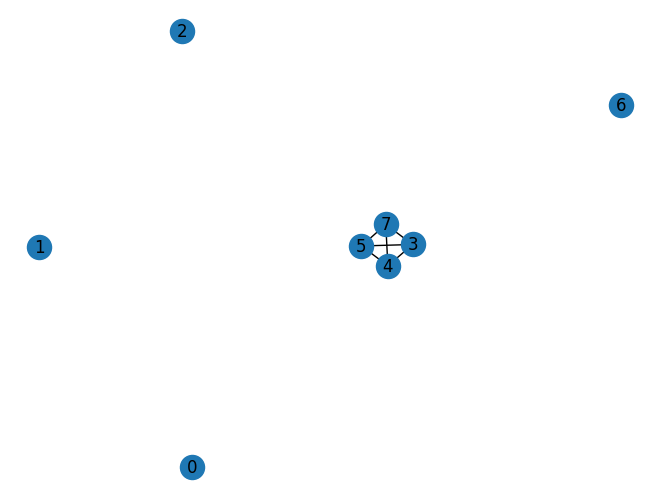

epoch 0 loss 22.1875


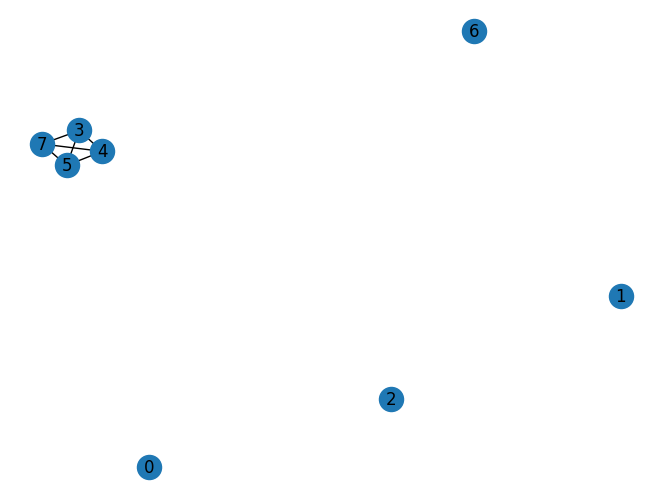

epoch 1 loss 25.625


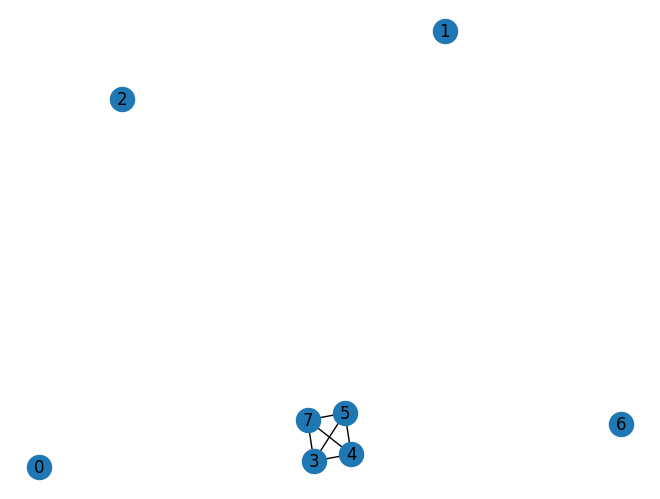

epoch 2 loss 25.3125


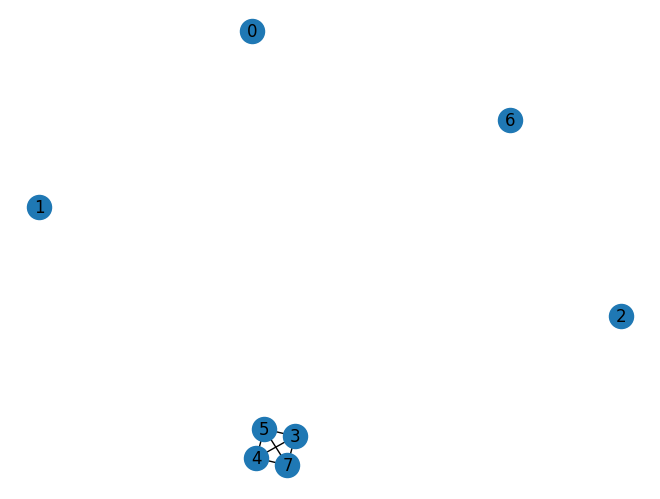

epoch 3 loss 25.0


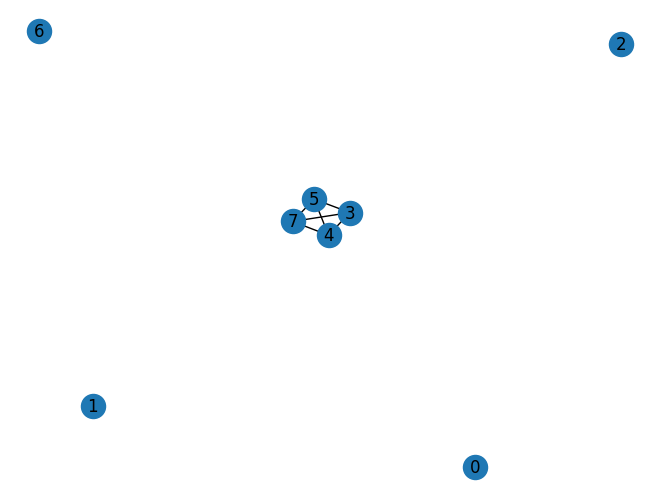

epoch 4 loss 24.375


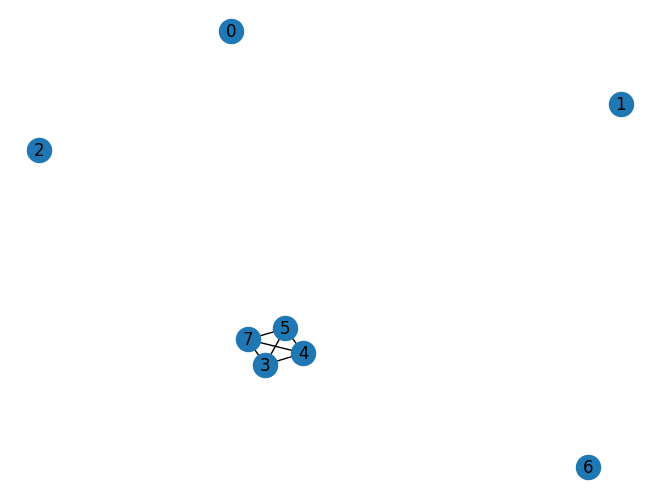

epoch 5 loss 28.75


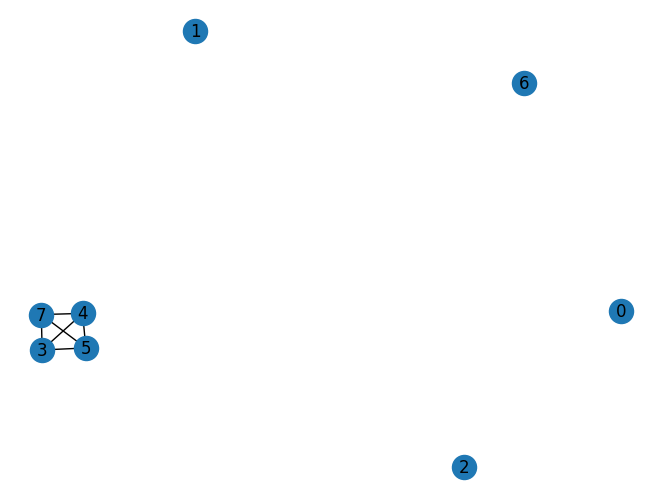

epoch 6 loss 25.0


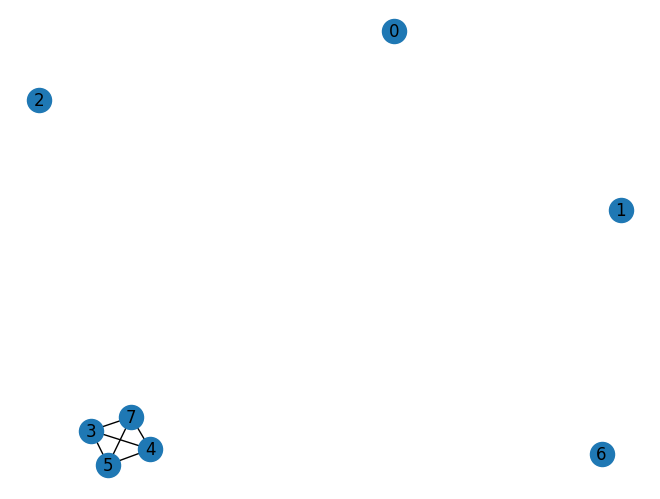

epoch 7 loss 25.9375


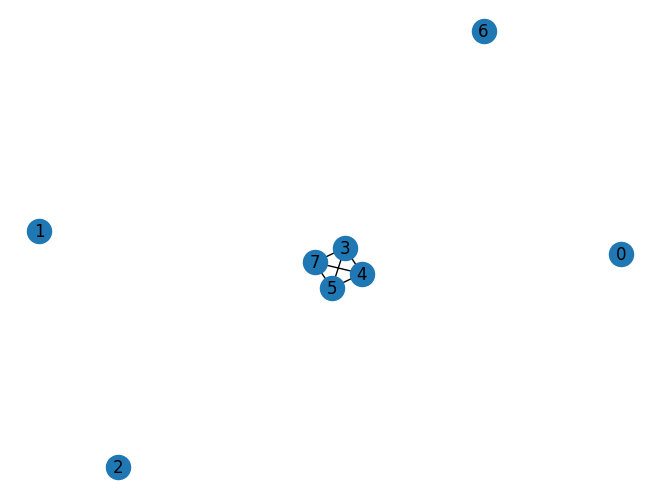

epoch 8 loss 25.625


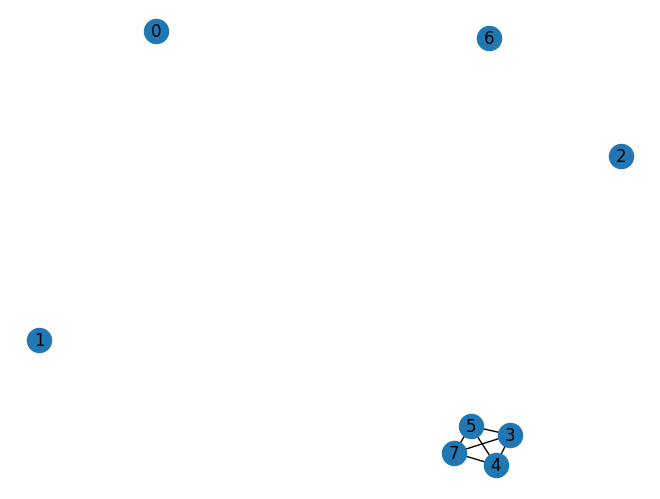

epoch 9 loss 27.8125


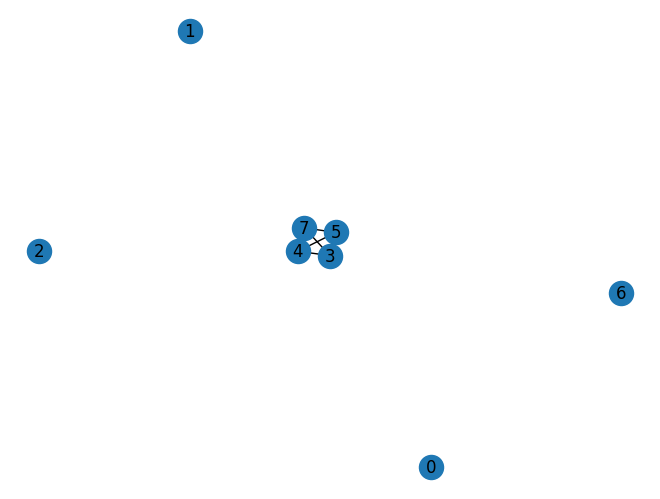

epoch 10 loss 24.6875


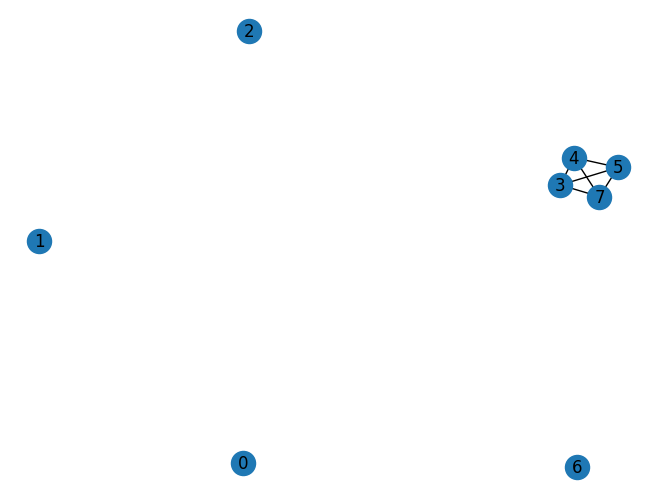

epoch 11 loss 21.5625


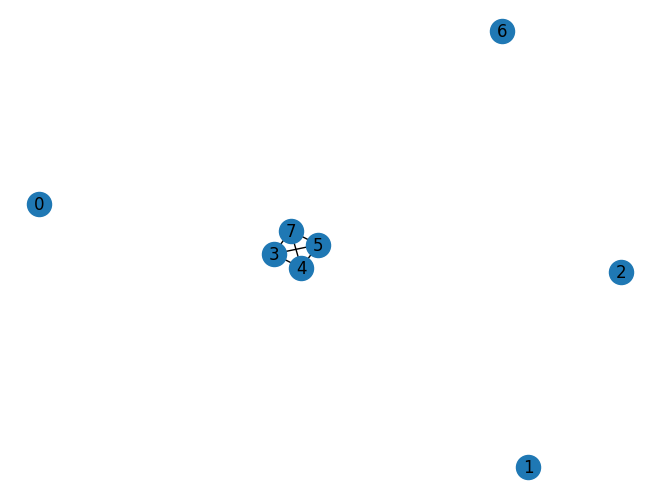

epoch 12 loss 24.6875


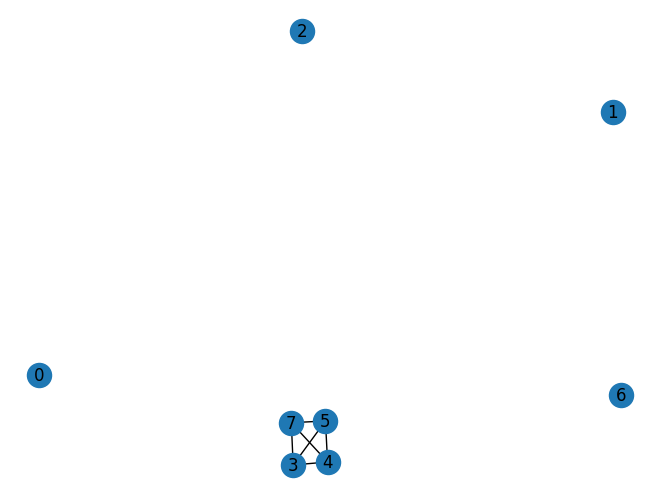

epoch 13 loss 28.4375


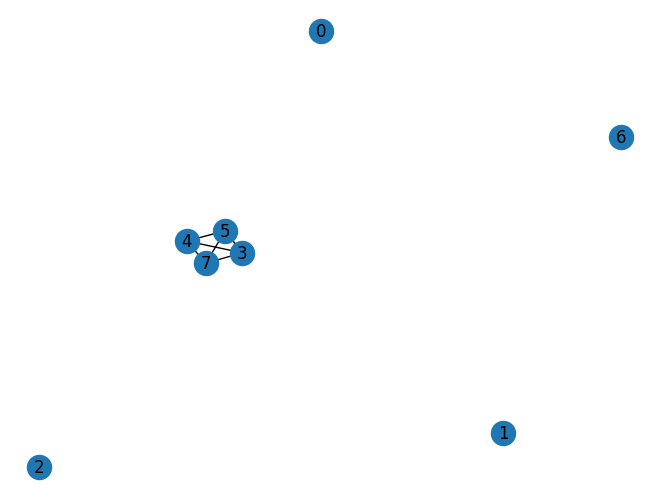

epoch 14 loss 29.375


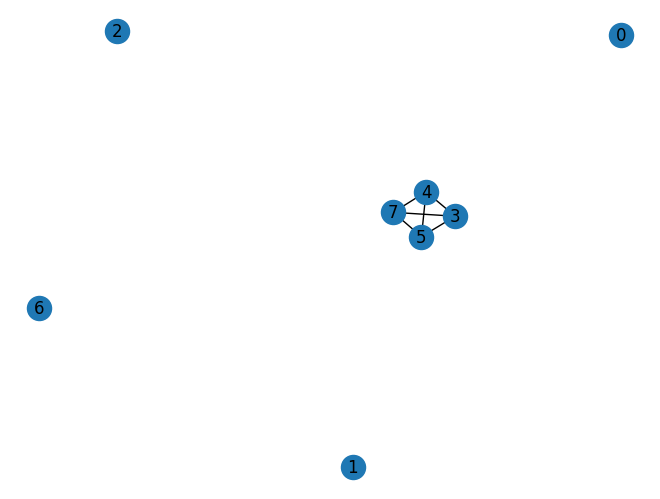

epoch 15 loss 26.875


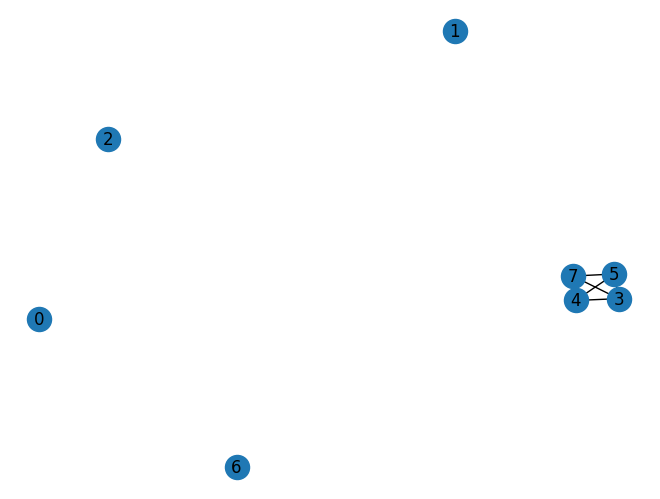

epoch 16 loss 23.75


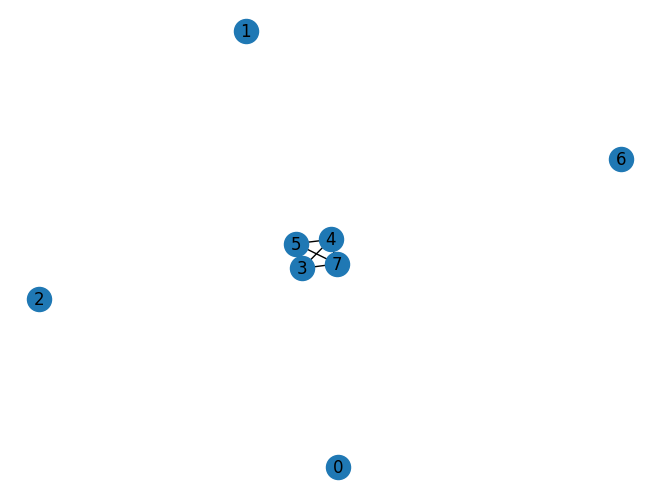

epoch 17 loss 23.4375


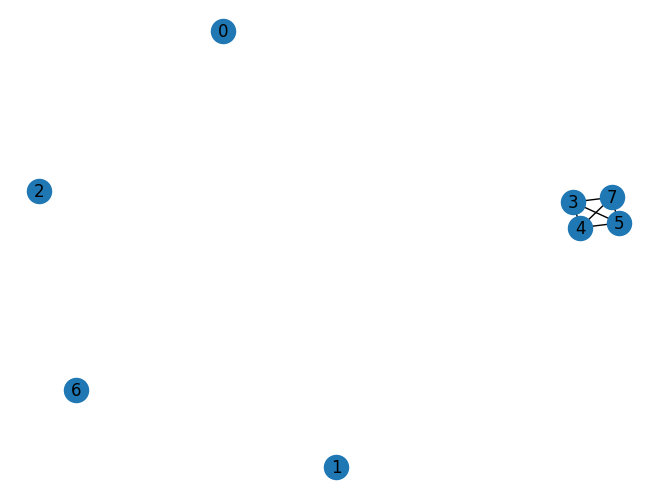

epoch 18 loss 25.625


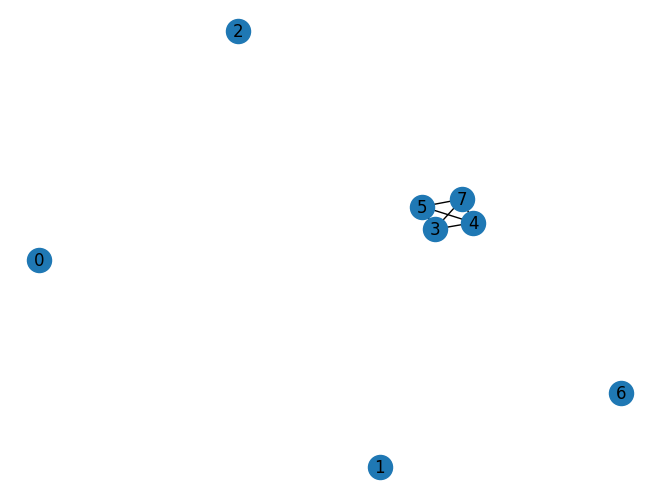

epoch 19 loss 27.5


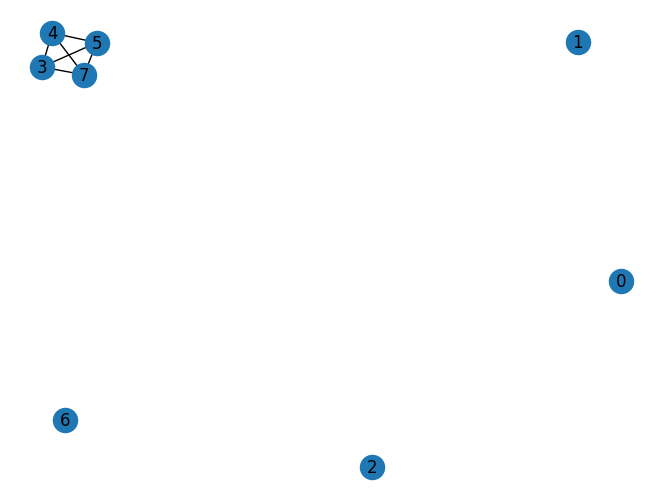

epoch 20 loss 22.5


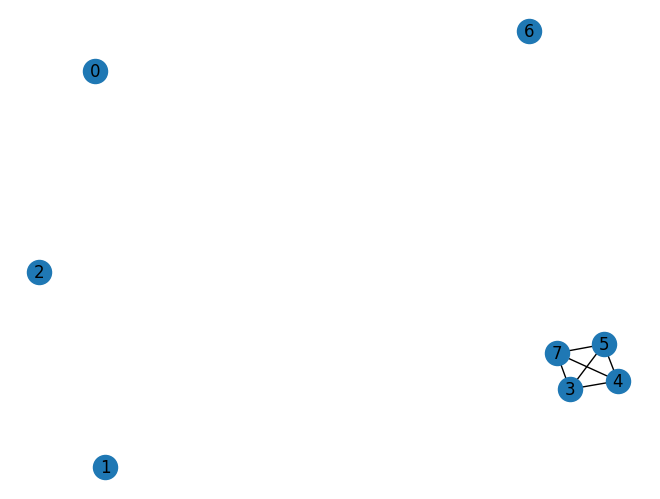

epoch 21 loss 25.625


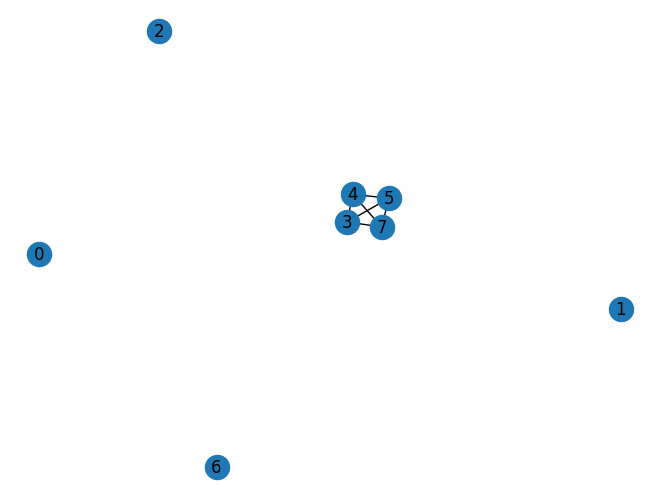

epoch 22 loss 27.5


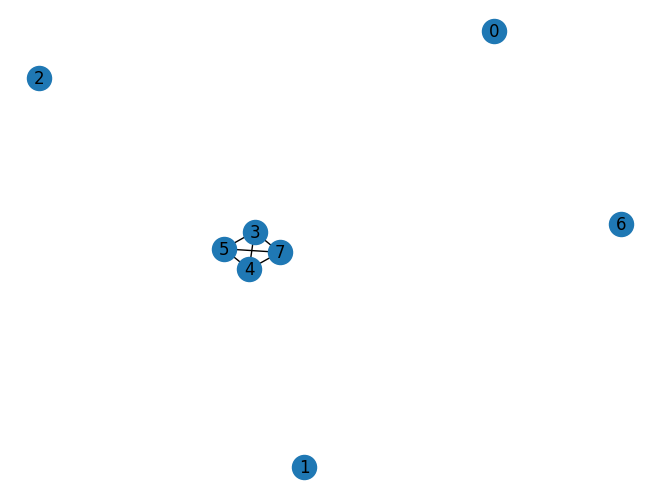

epoch 23 loss 30.0


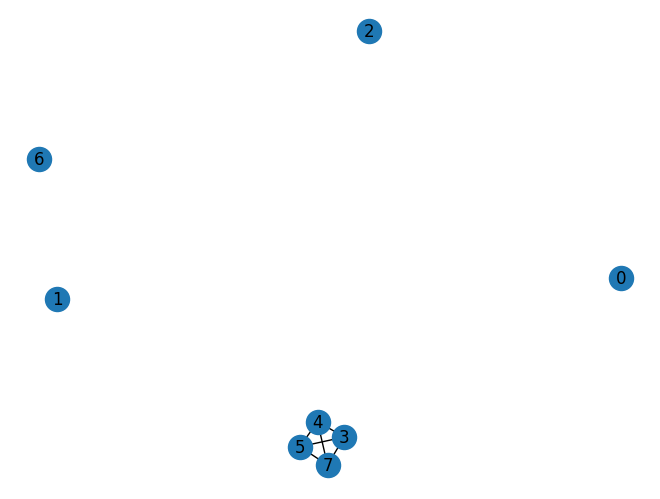

epoch 24 loss 23.125


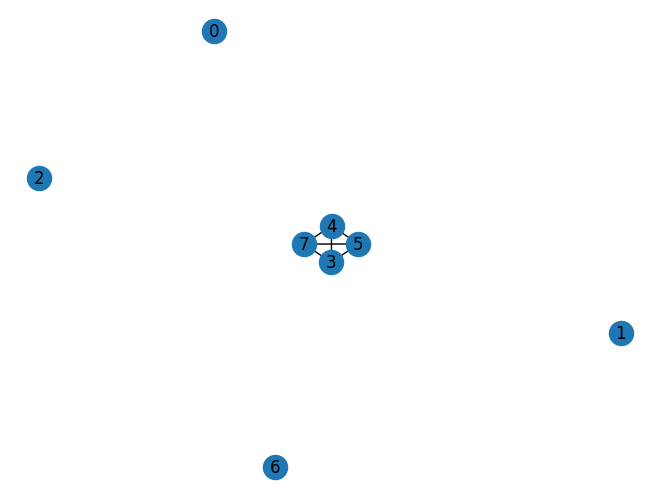

epoch 25 loss 27.8125


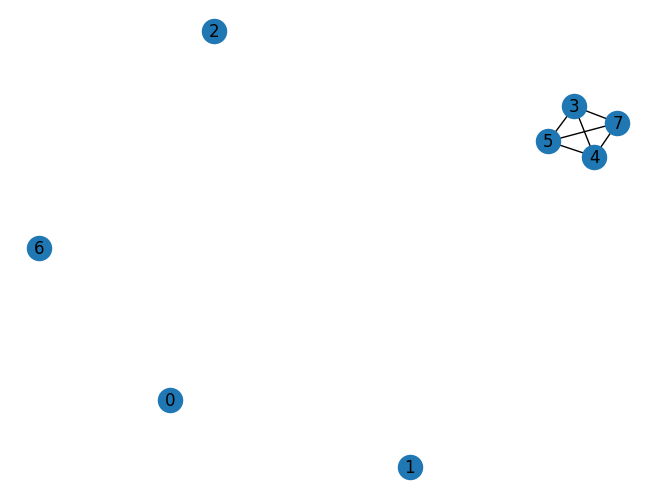

epoch 26 loss 25.9375


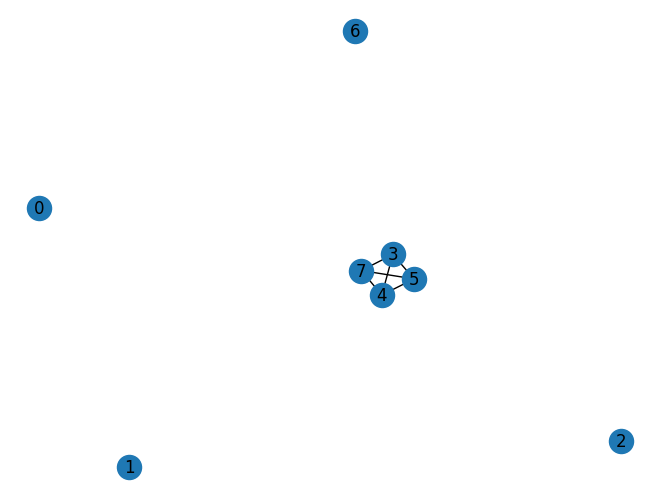

epoch 27 loss 25.625


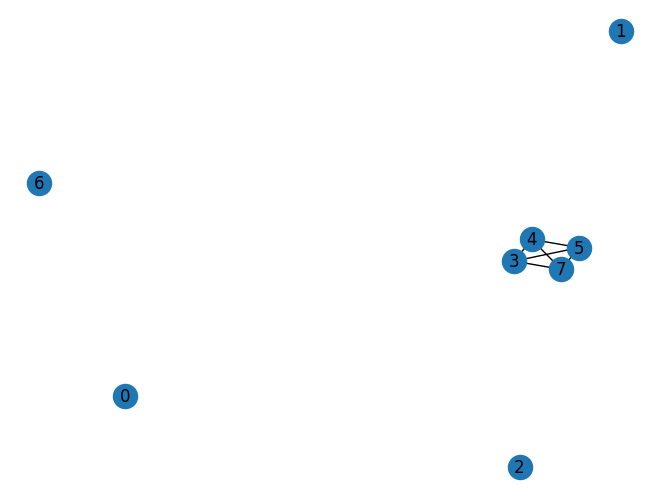

epoch 28 loss 26.5625


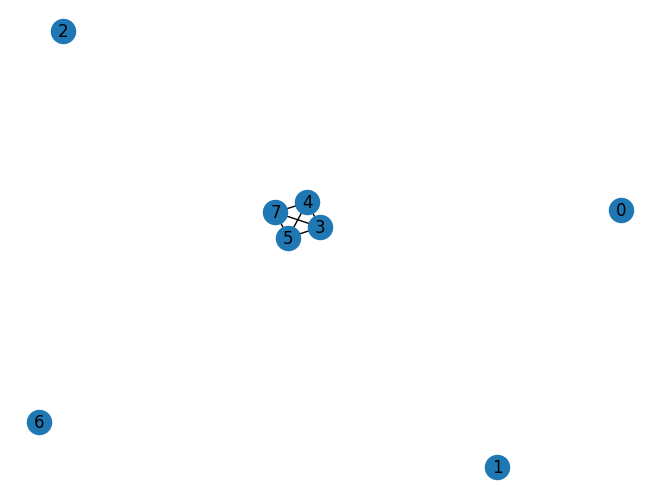

epoch 29 loss 24.375


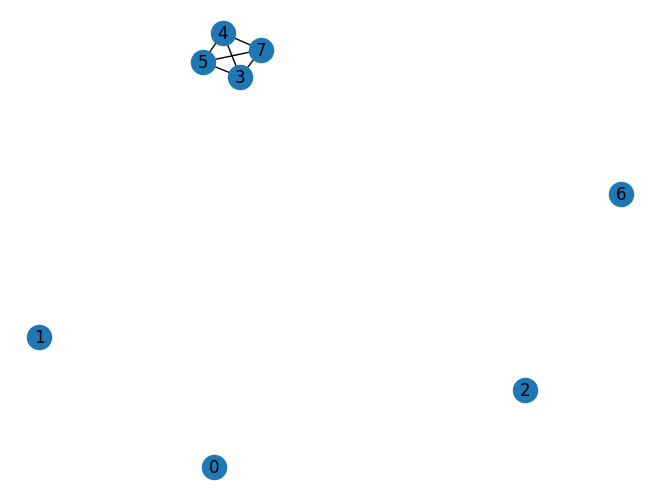

epoch 30 loss 26.25


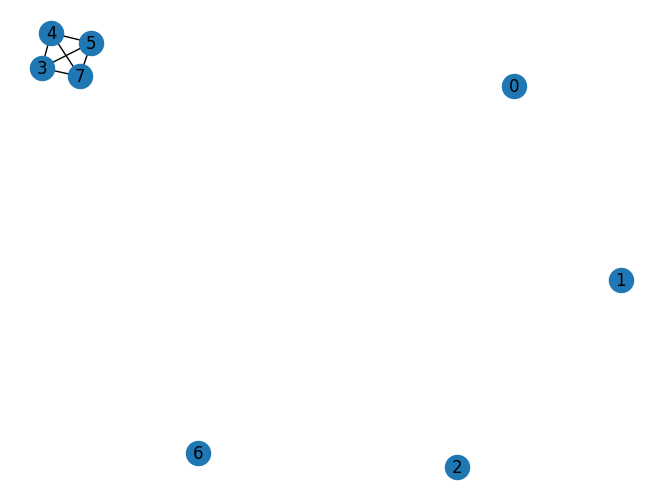

epoch 31 loss 27.5


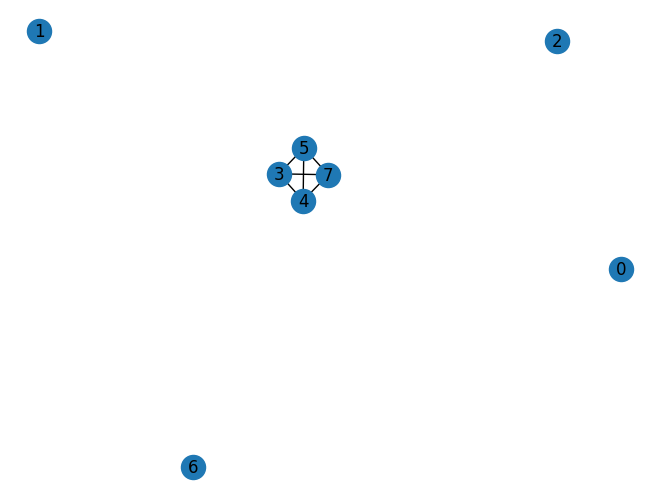

epoch 32 loss 21.875


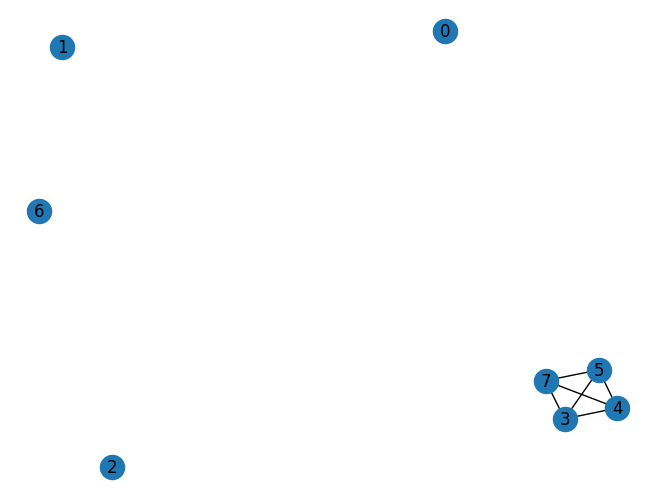

epoch 33 loss 28.4375


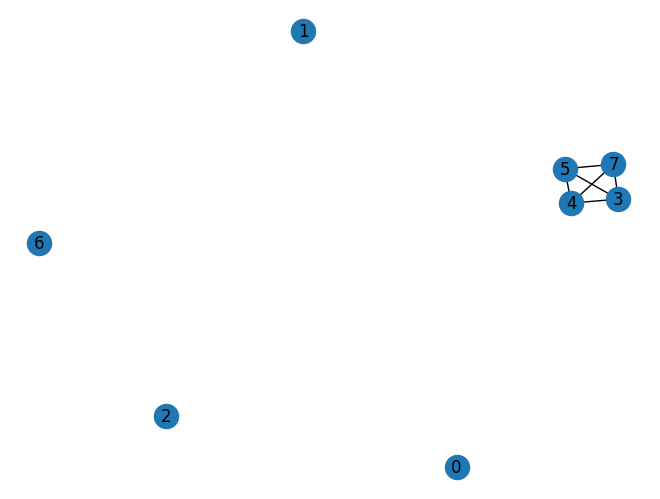

epoch 34 loss 25.0


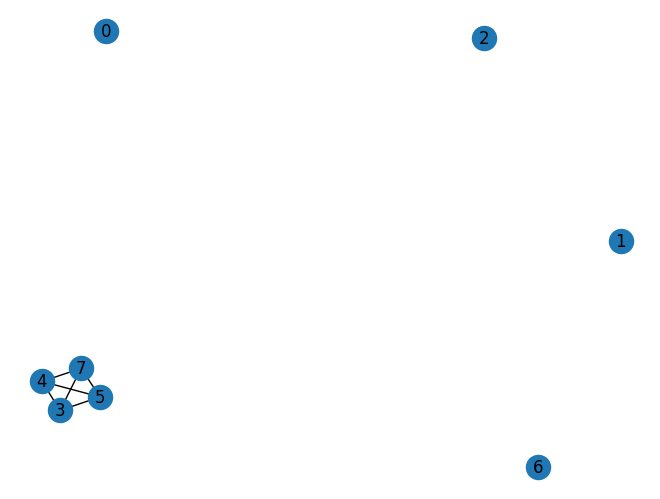

epoch 35 loss 26.25


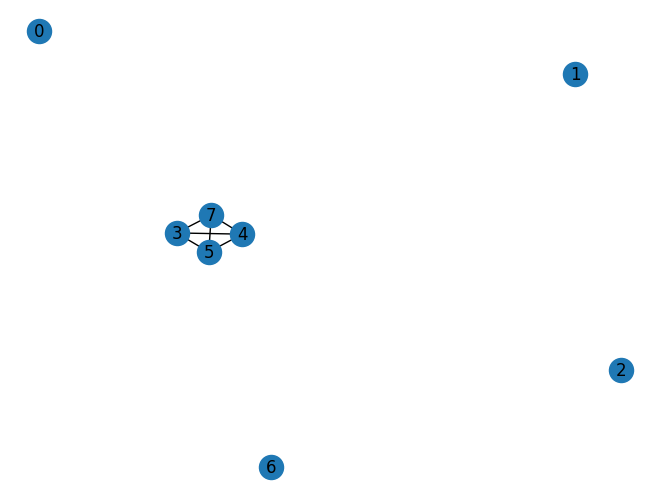

epoch 36 loss 26.5625


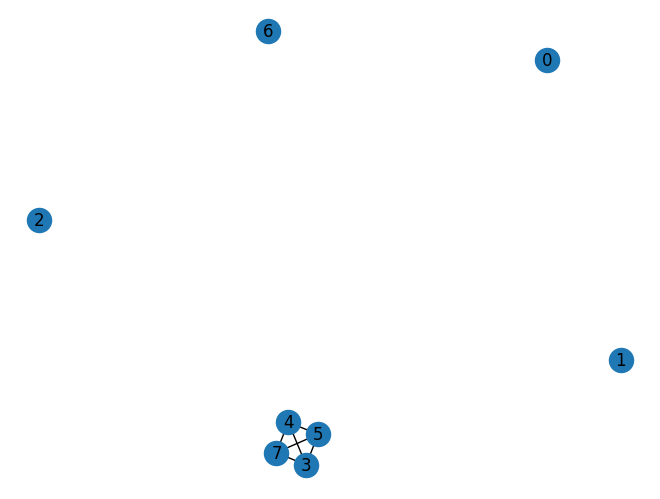

epoch 37 loss 24.6875


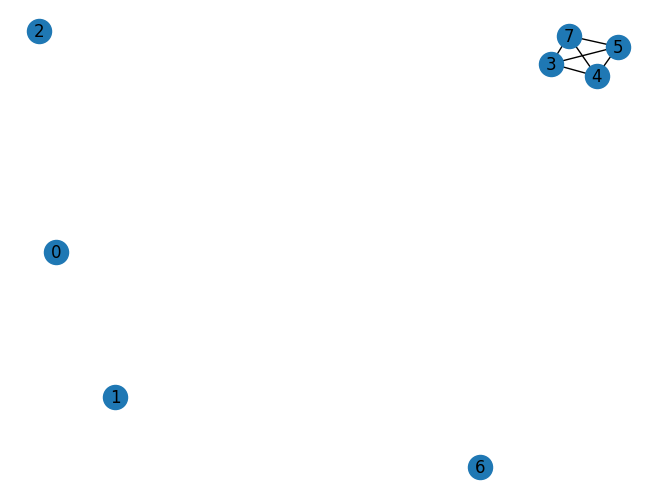

epoch 38 loss 26.875


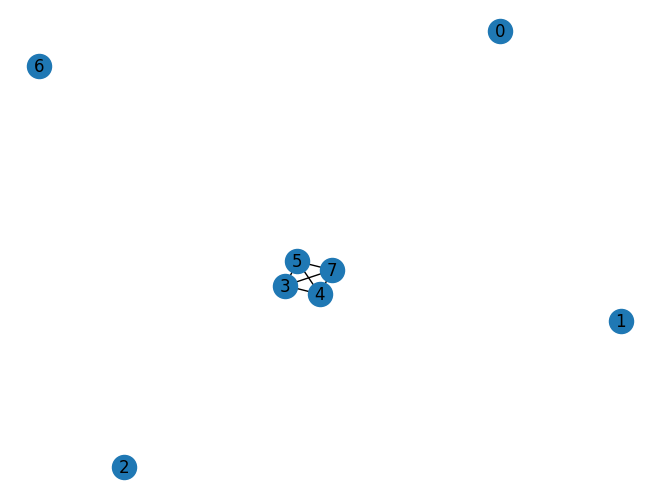

epoch 39 loss 22.5


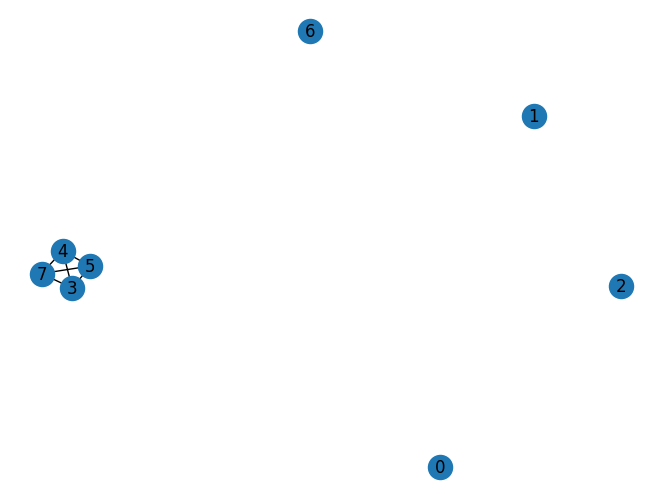

epoch 40 loss 25.0


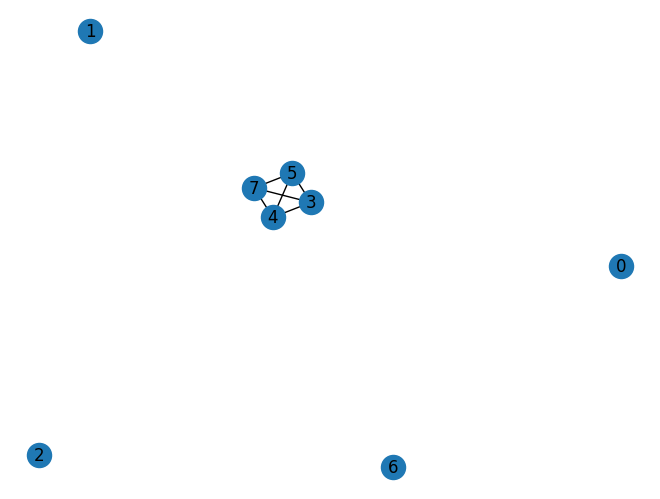

epoch 41 loss 25.9375


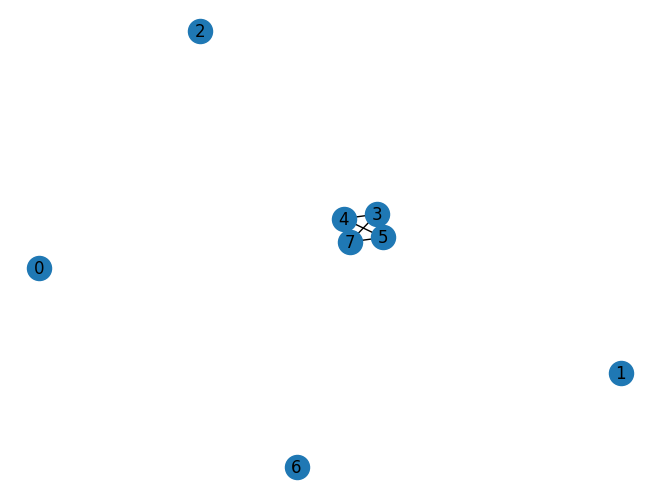

epoch 42 loss 26.875


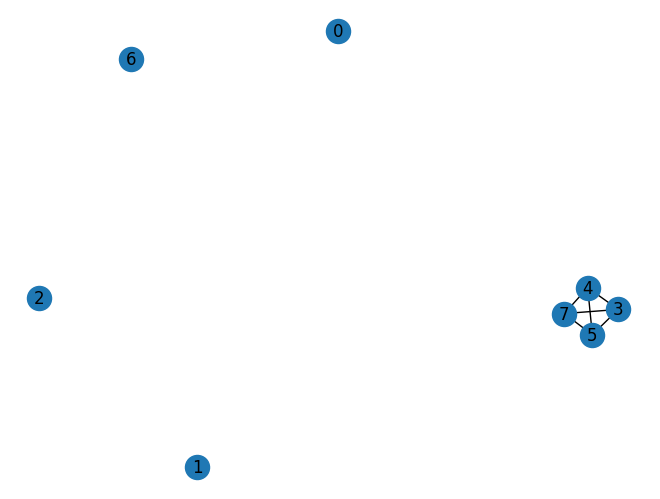

epoch 43 loss 26.25


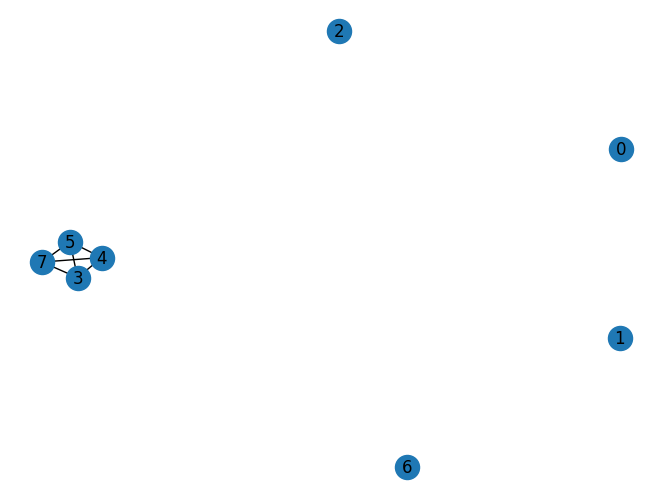

epoch 44 loss 25.625


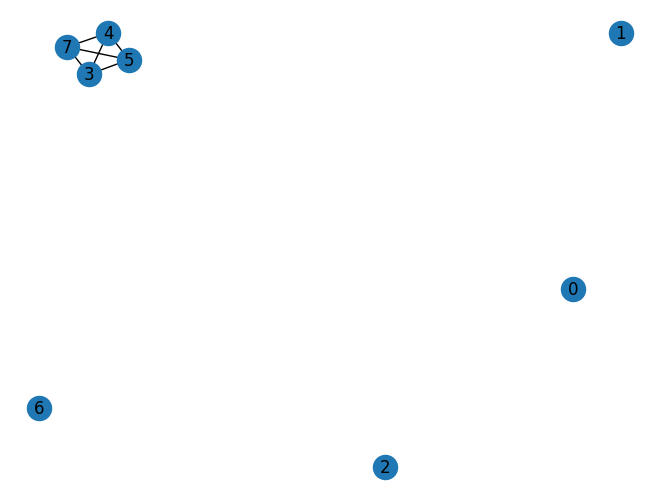

epoch 45 loss 26.875


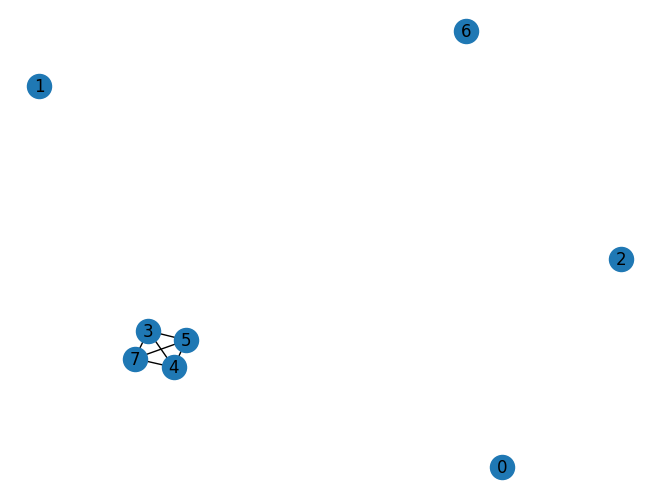

epoch 46 loss 28.75


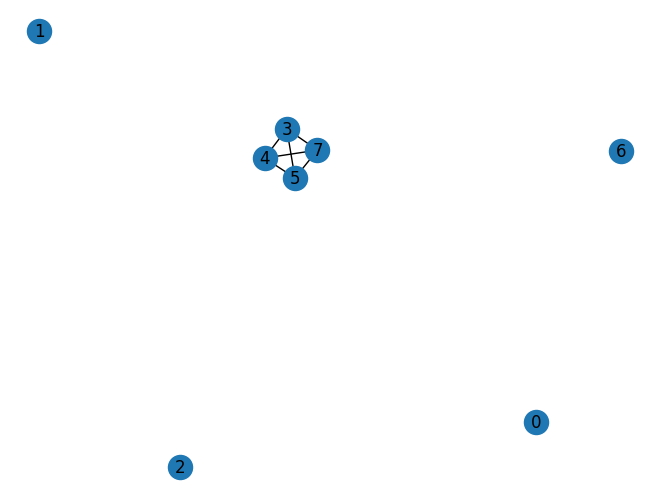

epoch 47 loss 26.5625


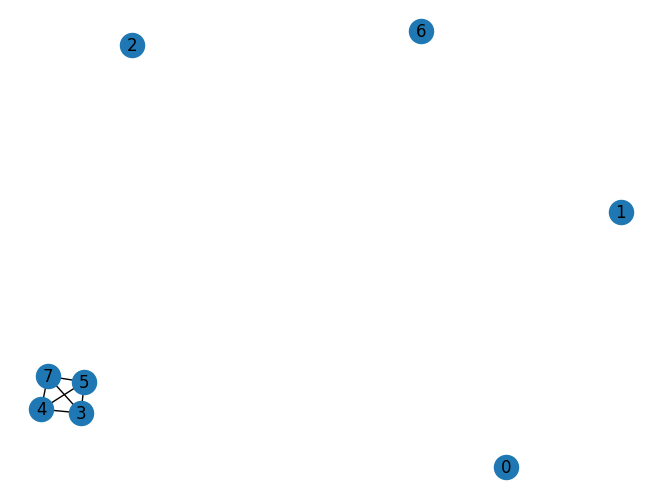

epoch 48 loss 23.75


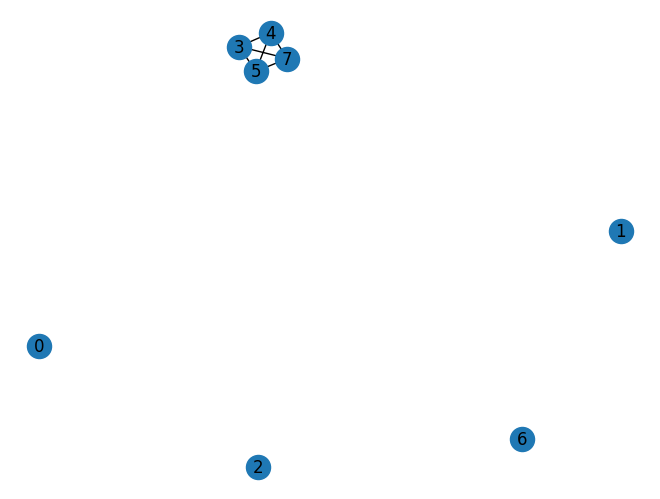

epoch 49 loss 25.9375


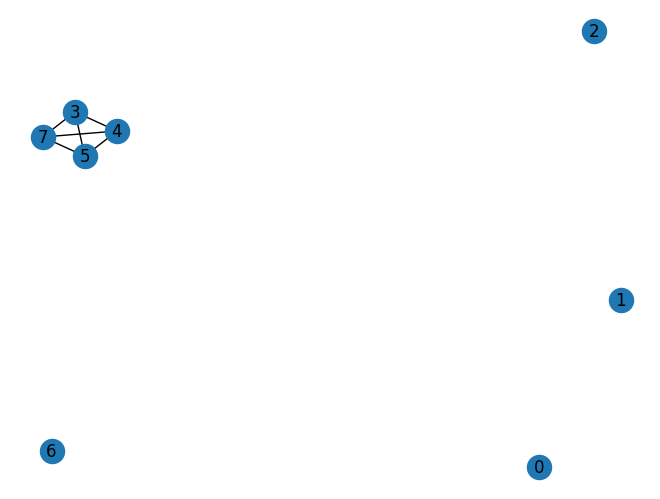

epoch 50 loss 27.5


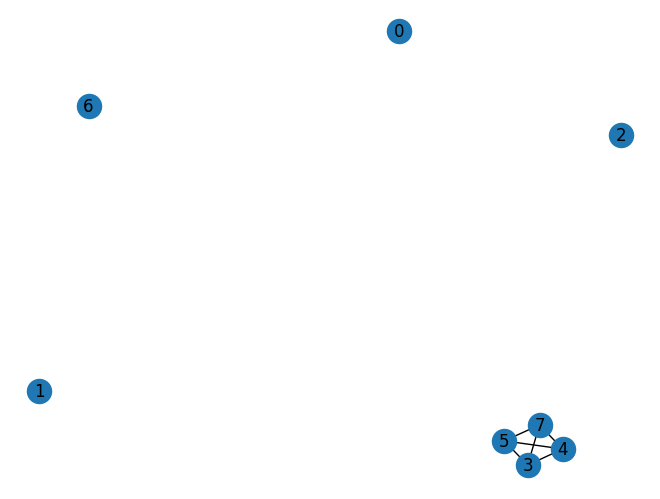

epoch 51 loss 26.875


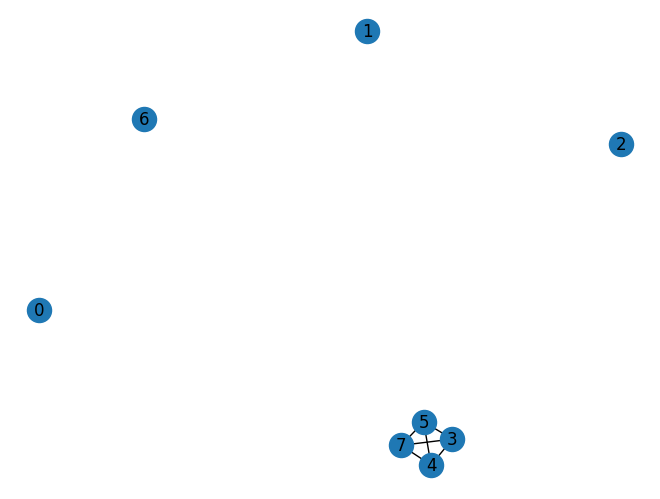

epoch 52 loss 24.375


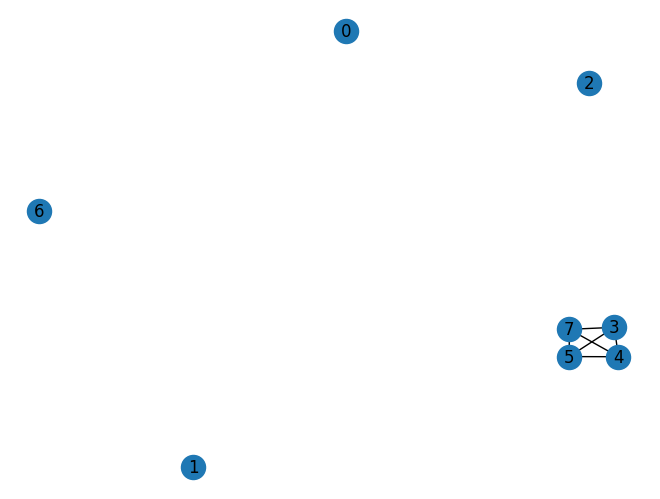

epoch 53 loss 25.0


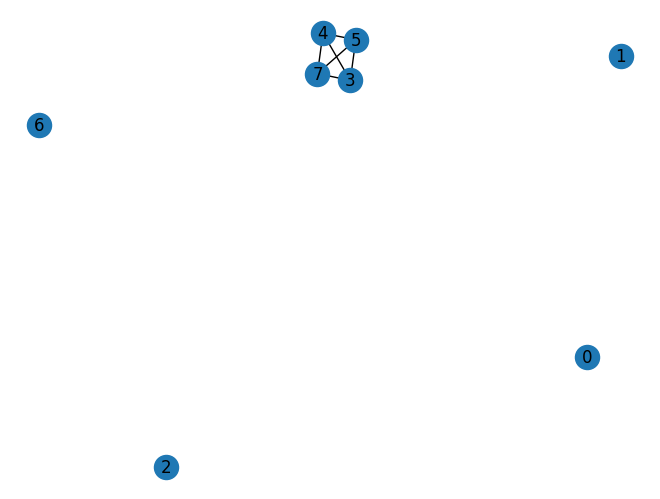

epoch 54 loss 24.6875


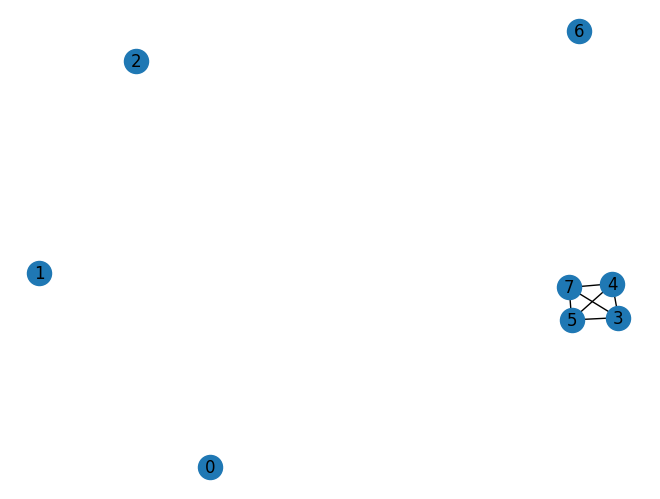

epoch 55 loss 25.625


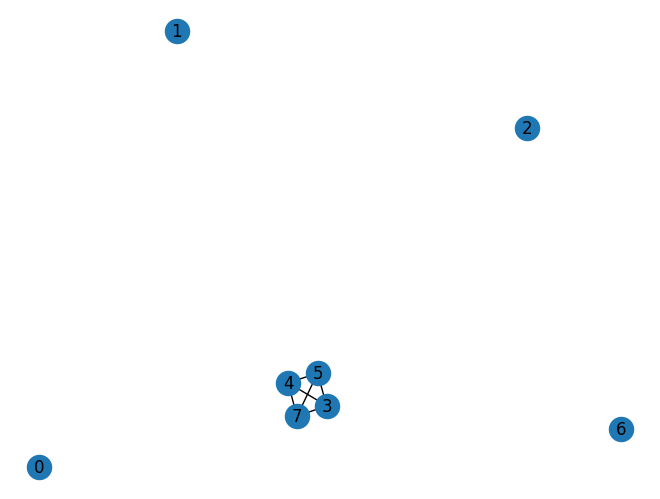

epoch 56 loss 23.75


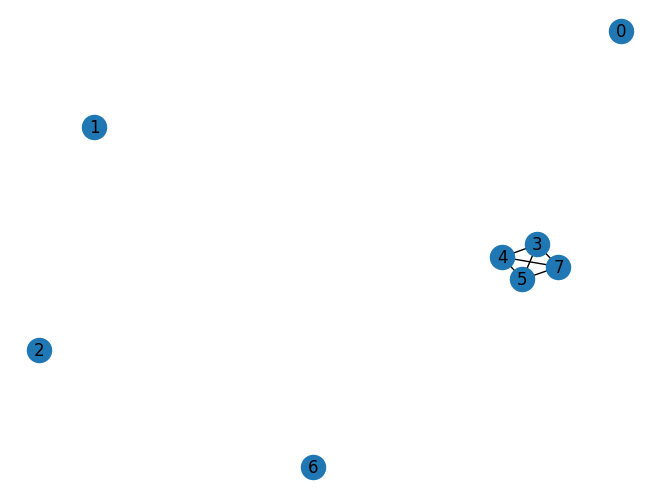

epoch 57 loss 27.5


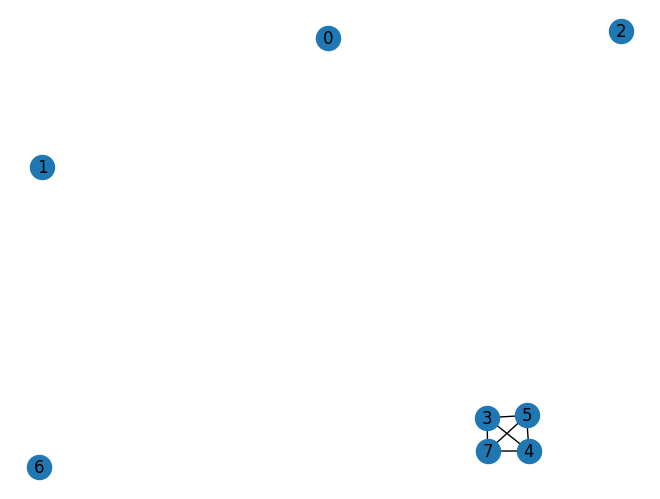

epoch 58 loss 27.1875


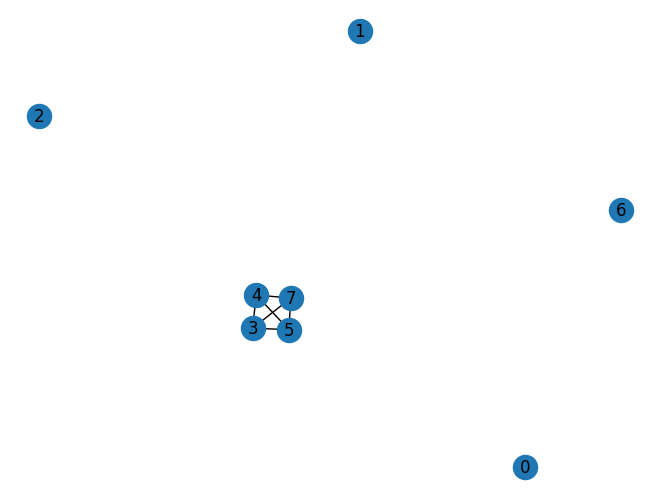

epoch 59 loss 26.875


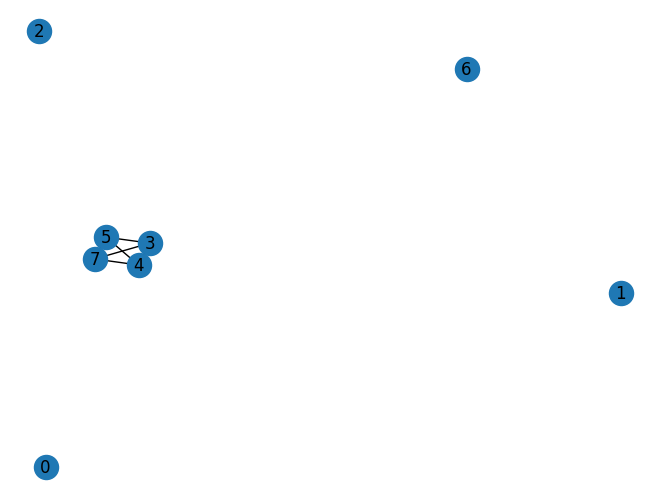

epoch 60 loss 25.0


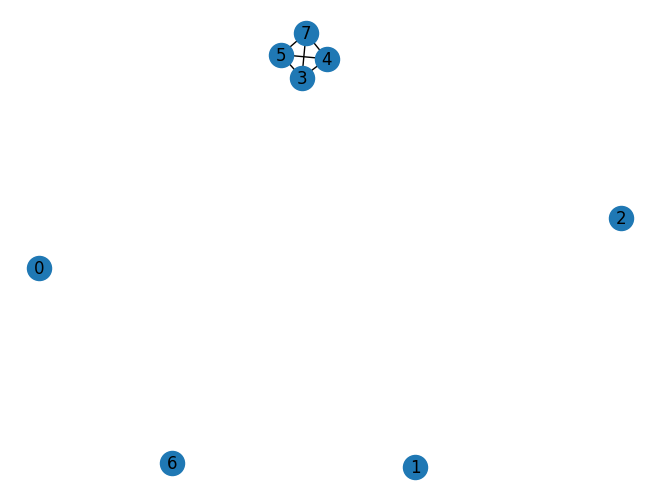

epoch 61 loss 25.9375


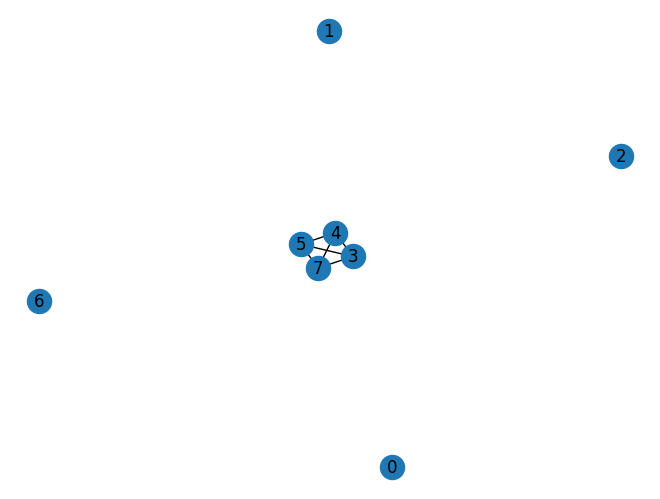

epoch 62 loss 25.9375


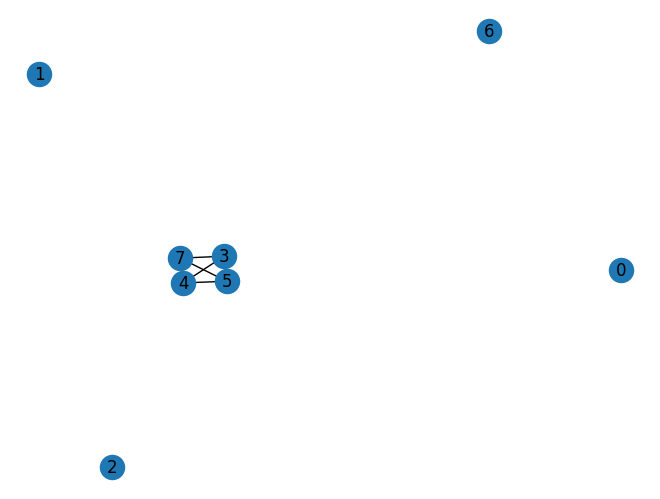

epoch 63 loss 23.75


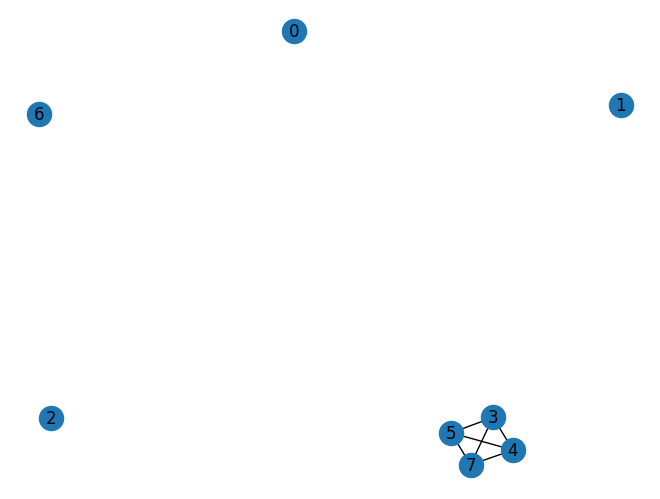

epoch 64 loss 24.6875


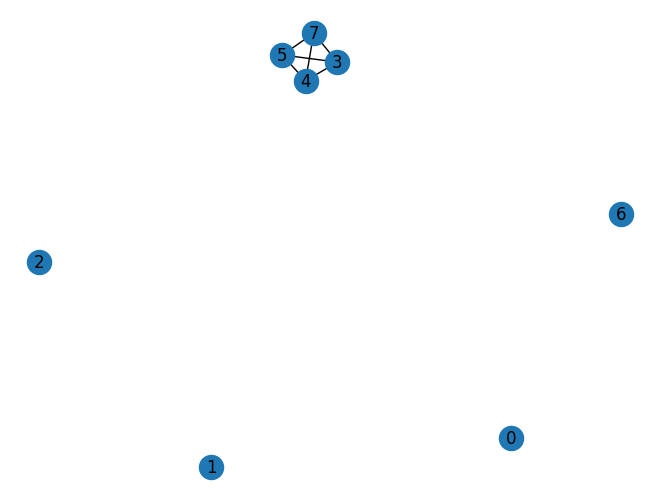

epoch 65 loss 23.75


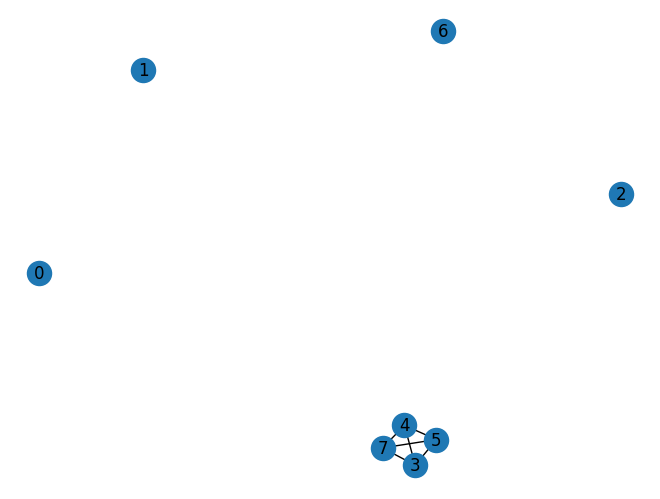

epoch 66 loss 26.25


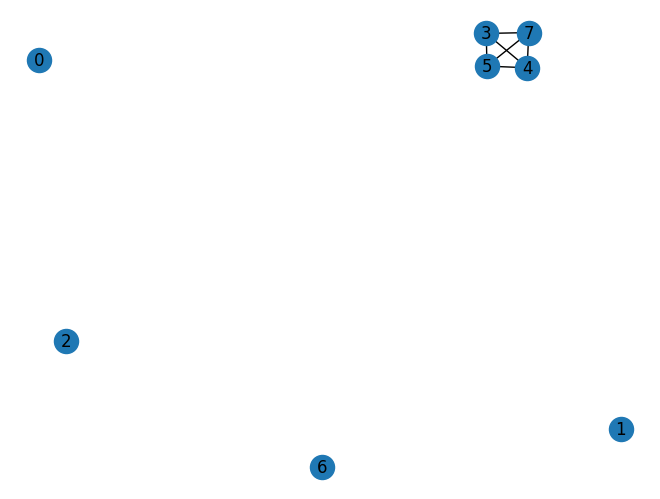

epoch 67 loss 22.8125


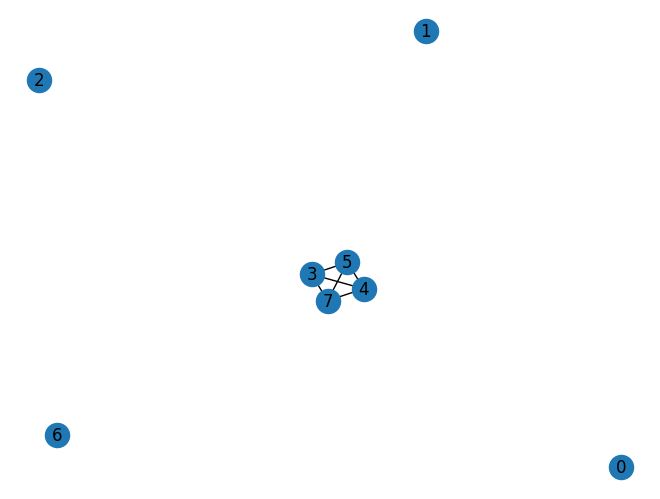

epoch 68 loss 25.625


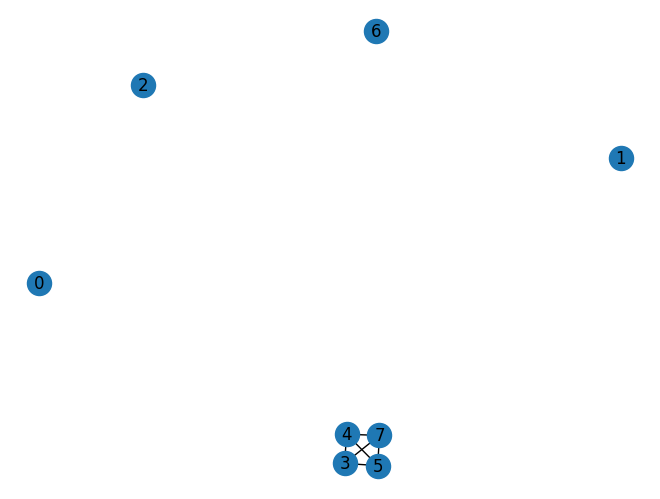

epoch 69 loss 21.875


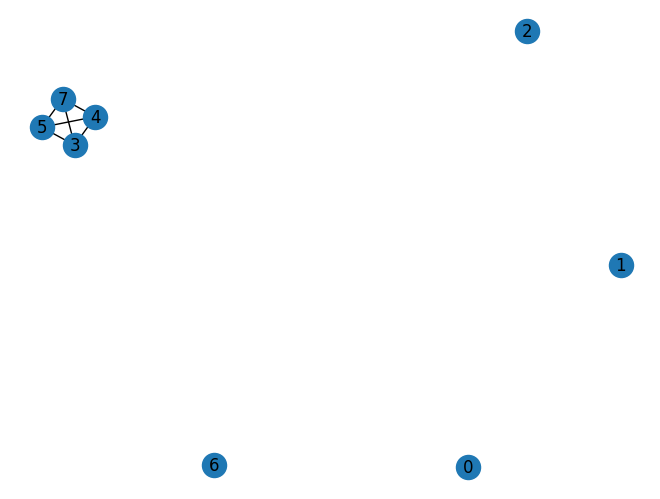

epoch 70 loss 26.875


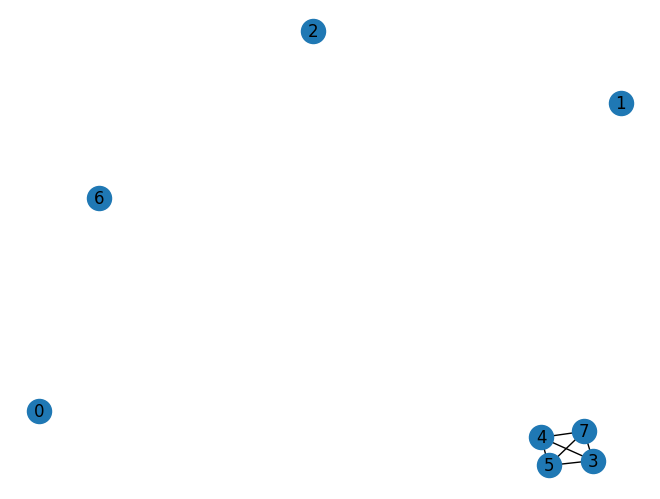

epoch 71 loss 27.5


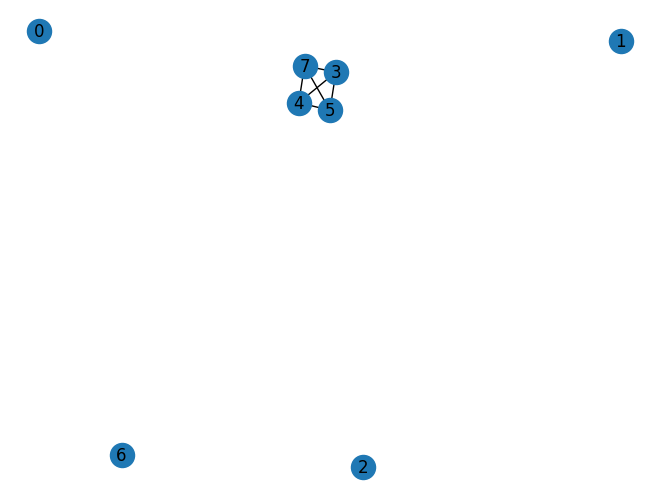

epoch 72 loss 22.8125


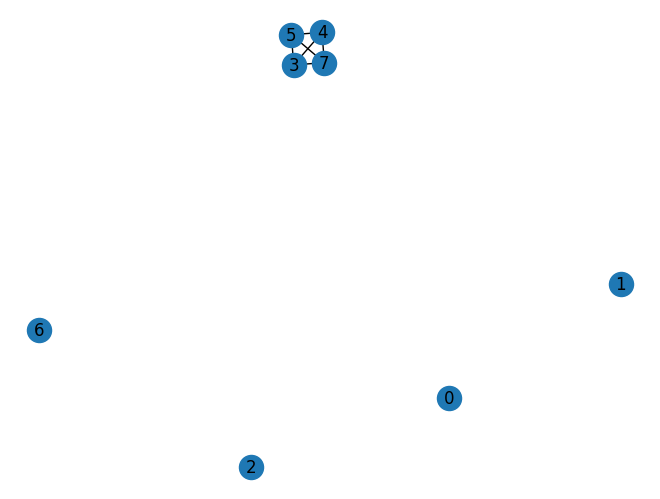

epoch 73 loss 26.875


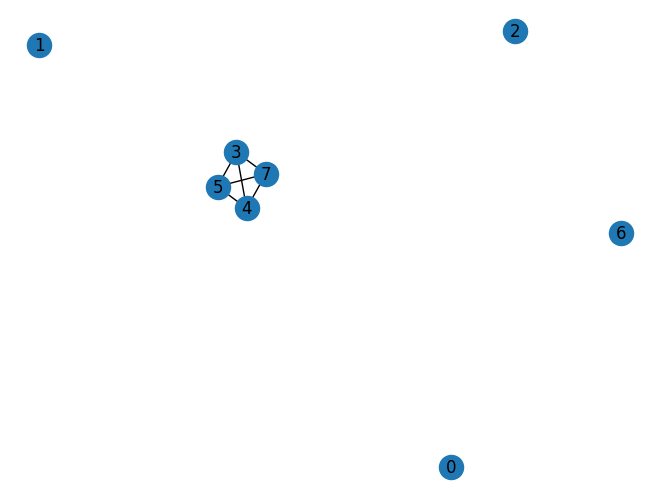

epoch 74 loss 25.0


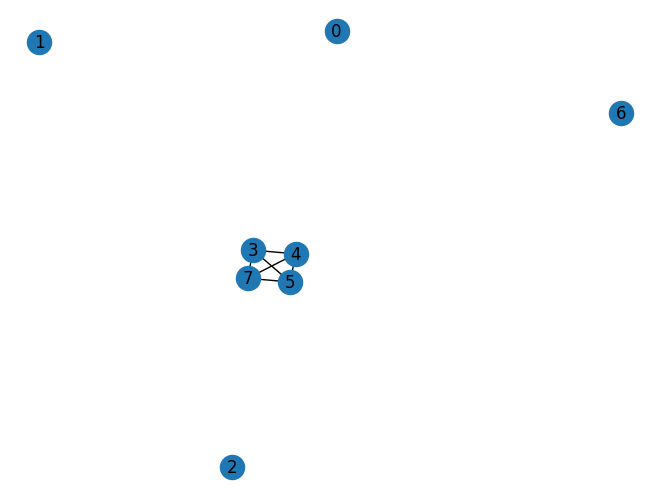

epoch 75 loss 25.9375


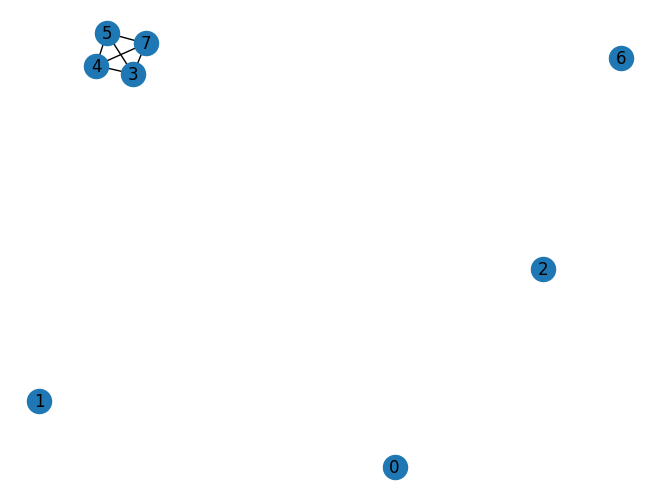

epoch 76 loss 25.9375


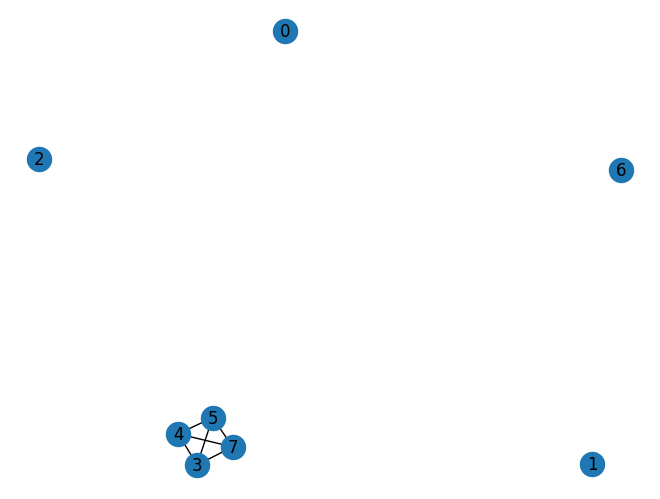

epoch 77 loss 26.25


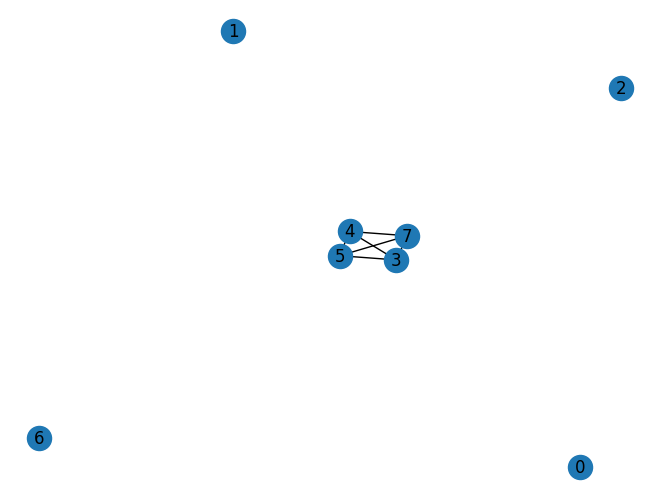

epoch 78 loss 25.625


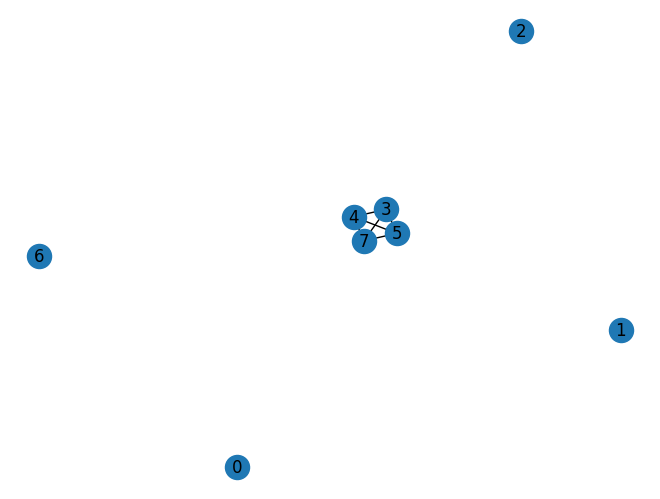

epoch 79 loss 24.0625


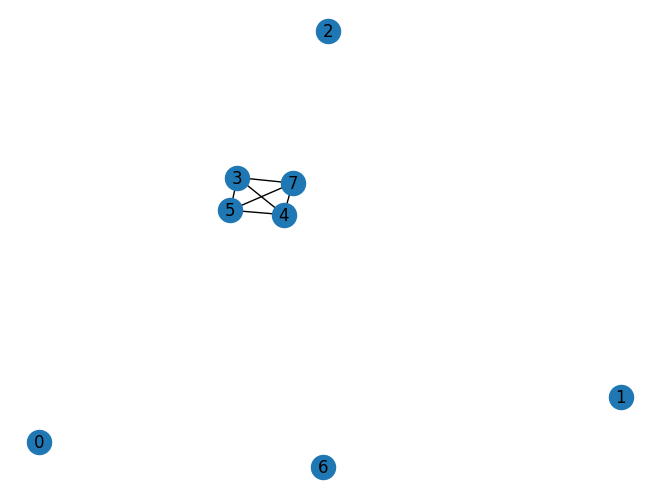

epoch 80 loss 24.375


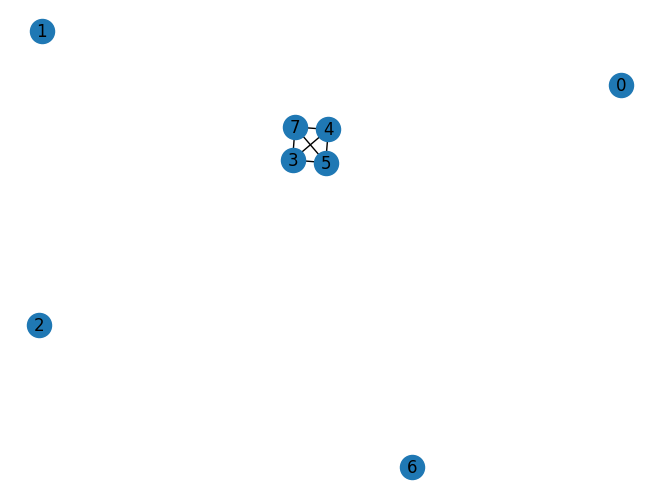

epoch 81 loss 27.1875


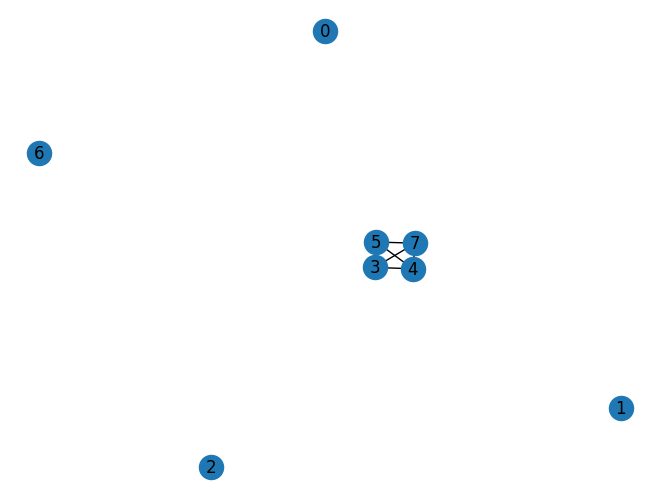

epoch 82 loss 26.5625


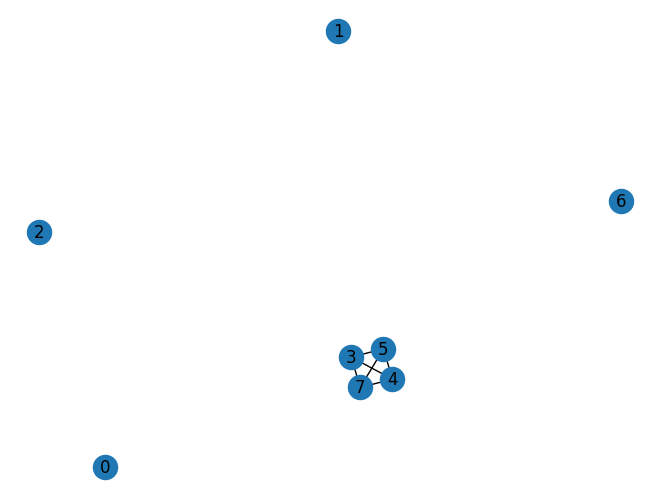

epoch 83 loss 24.0625


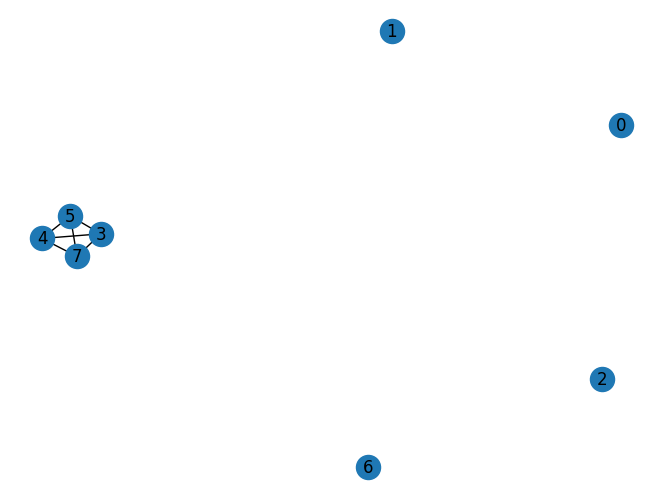

epoch 84 loss 26.875


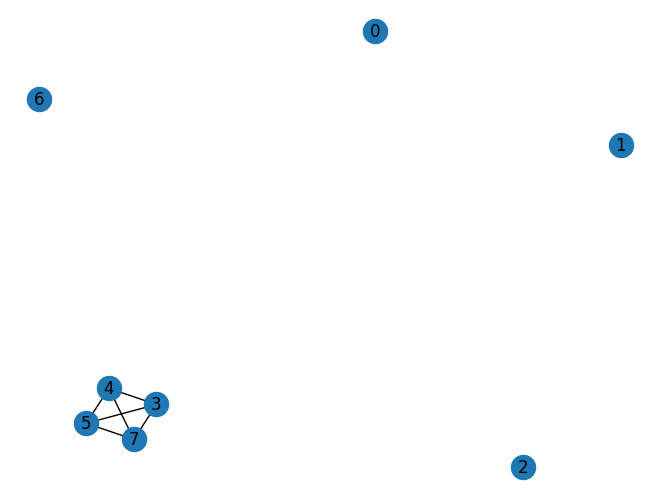

epoch 85 loss 24.0625


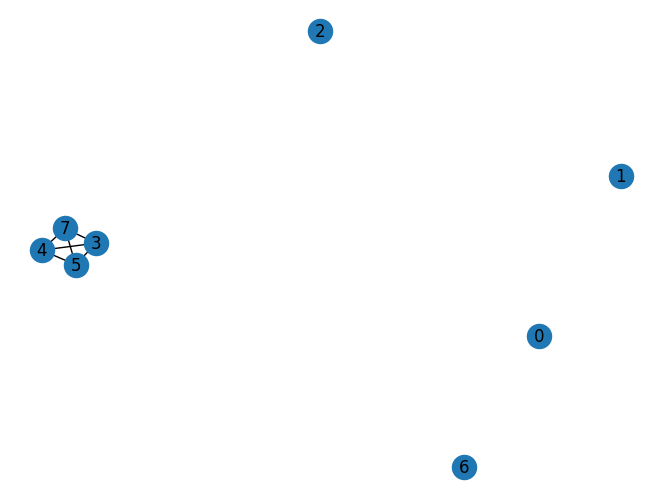

epoch 86 loss 28.125


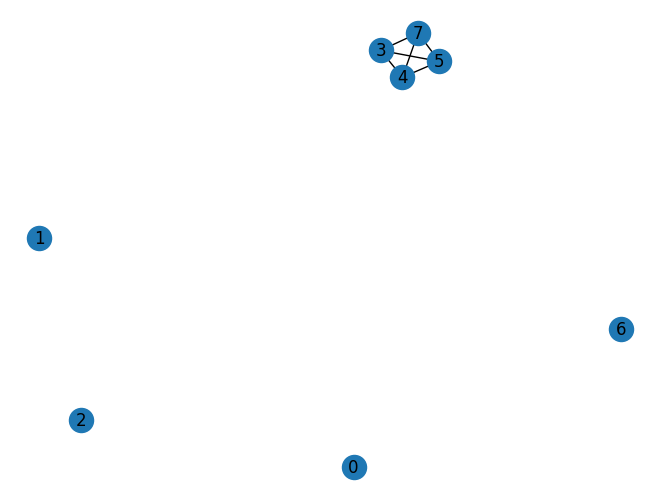

epoch 87 loss 26.25


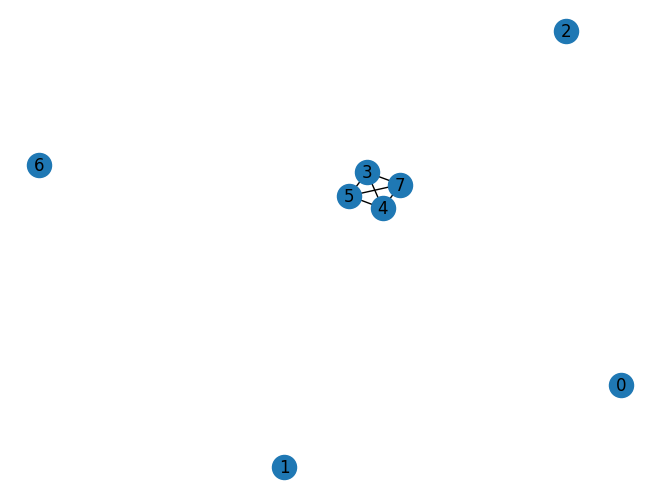

epoch 88 loss 26.25


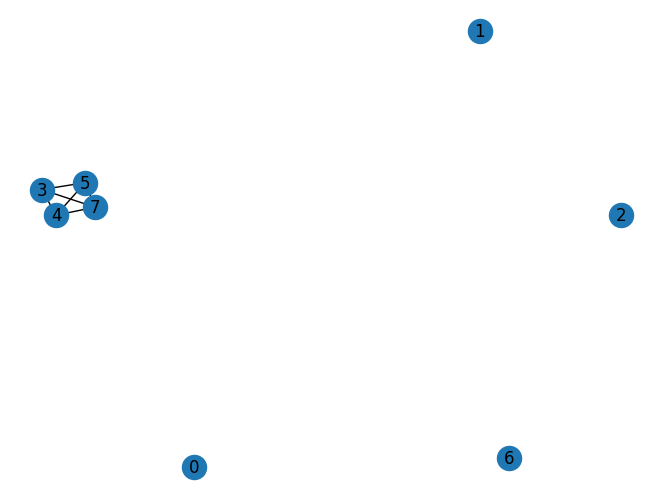

epoch 89 loss 25.625


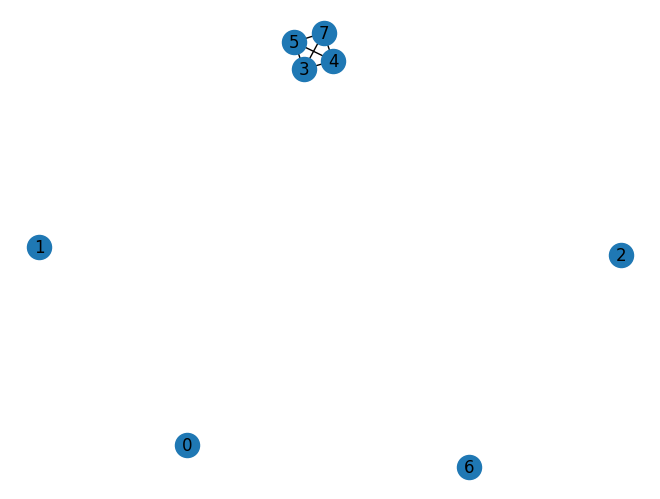

epoch 90 loss 27.8125


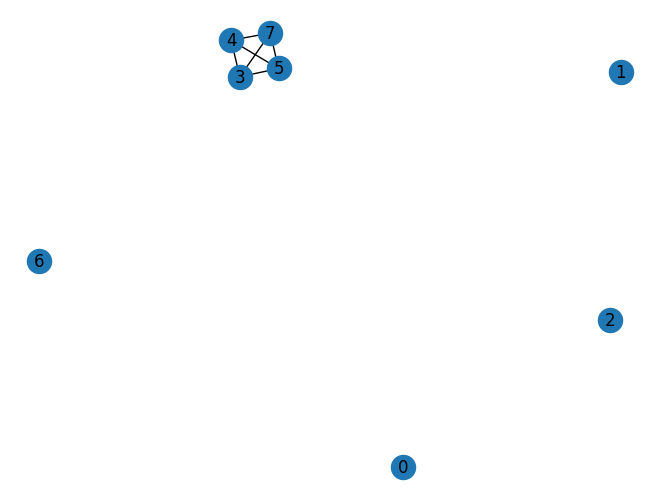

epoch 91 loss 26.25


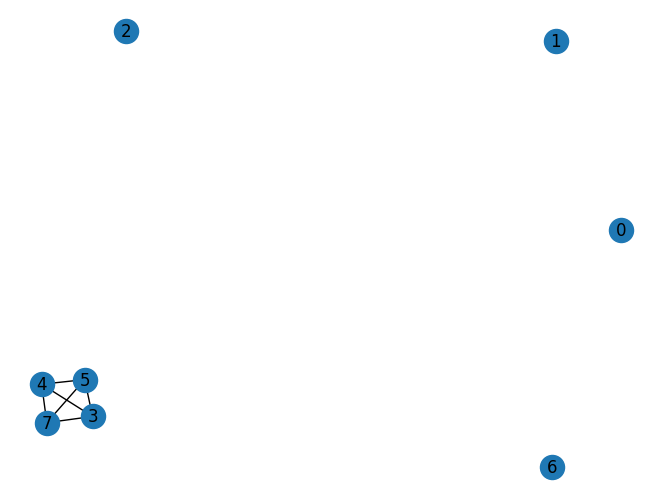

epoch 92 loss 25.0


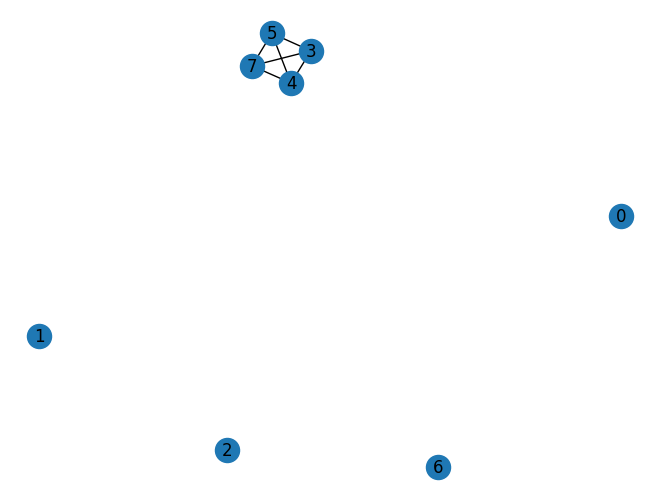

epoch 93 loss 26.25


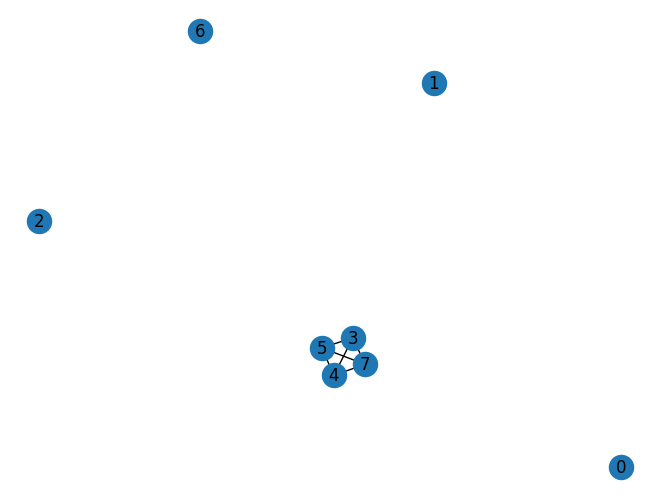

epoch 94 loss 25.0


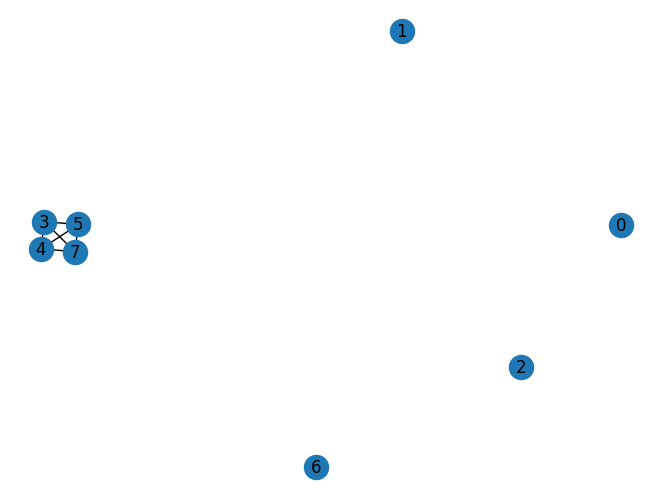

epoch 95 loss 22.5


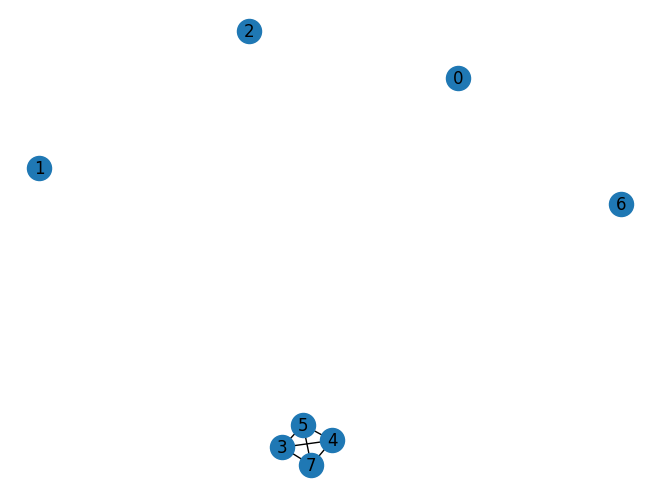

epoch 96 loss 23.75


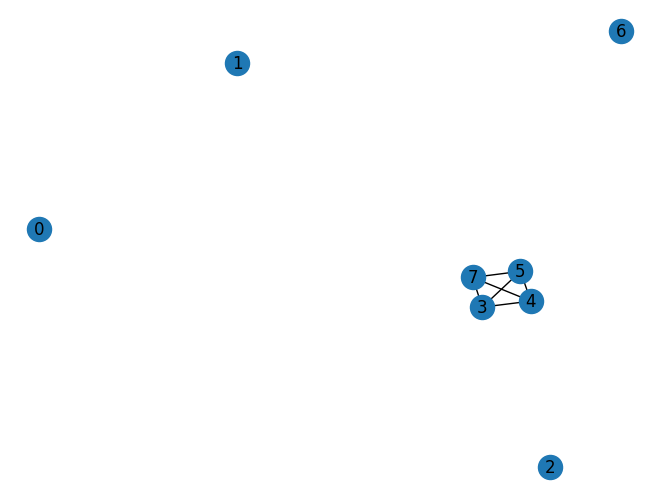

epoch 97 loss 27.1875


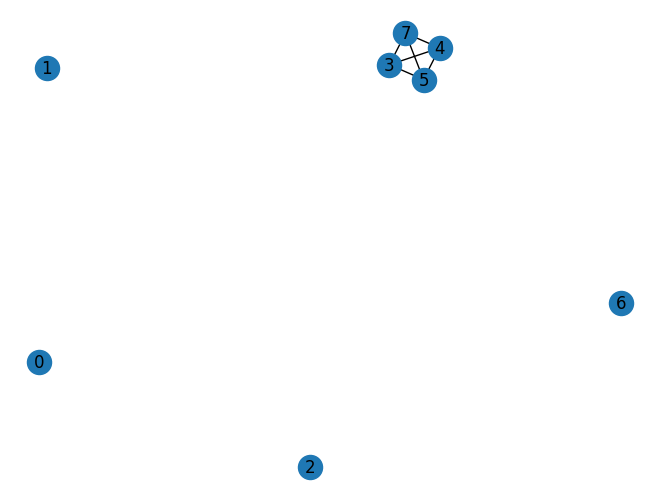

epoch 98 loss 24.375


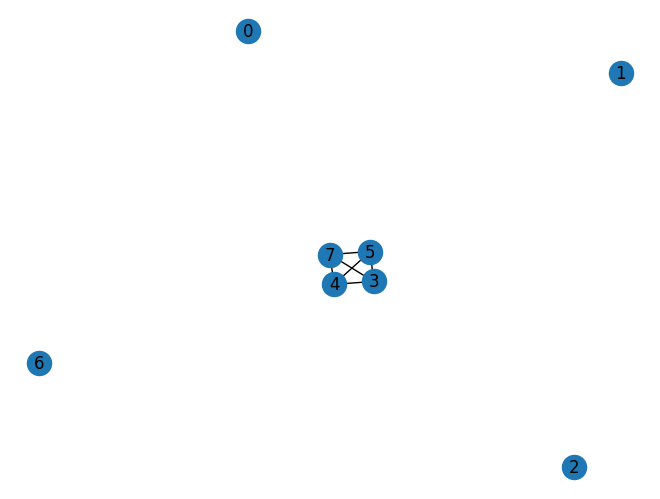

epoch 99 loss 25.9375


In [ ]:
graphAE = GraphAE(8)
graphAE.train()

In [ ]:
class GraphConvLayer (nn.Module):
  def __init__(self, input_dim ,output_dim):
    super(GraphConvLayer, self).__init__()
    self.main = nn.Sequential(
        nn.Linear(in_features = input_dim, out_features = output_dim, bias = False)
    )

  def forward (self, A, X):
    return self.main(A.float() @ X.float())

In [ ]:
def matrixProb (H, H_prob):
  for i in range (H.shape[0]):
    p = H[i].T @ H[i]

    for j in range (p.shape[0]):
      for k in range (p.shape[1]):
        if p[j, k] >= threshold:
          p[j][k] = 1.0
        else:
          p[j, k] = 0.0
      p[j, j] = 0.0

    H_prob[i] = p.clone()
  return H_prob

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.2 MB/s eta 0:00:00


In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 42.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=914318321e53937b95c8cbf67174d0a2816c3b0d6889a48a00f1ada57b7cf5ee
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
!unzip /content/output.zip

unzip:  cannot find or open /content/output.zip, /content/output.zip.zip or /content/output.zip.ZIP.


In [ ]:
!pip install --upgrade networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
